Function fitting (Kernel Ridge Regression) : molecular solubility
====

This computer project introduces Kernel Ridge Regression (also known as Gaussian process regression) for fitting 
functions in many dimensions. The concrete application is to make a model of the solubility of small organic
molecules as a function of their molecular structure. 

The number of different organic molecules is enormous, even just considering the small ones. There is an [online database](https://gdb.unibe.ch/downloads) 
of all possible organic molecules made from various number of heavy (non-hydrogen) atoms.
The number of possibilities is enormous, here is a fun fact: you can make nearly [1 billion different shapes from 
6 LEGO bricks](https://brickset.com/article/30827/review-624210-lego-house-6-bricks). One of them is shown below
(printed on a visitor card at the end of a tour, each one unique). Organic molecules are bit similar: you can branch the carbon framework and hang 
off three other elements (H,O,N) or more (if you include halides like Cl and F, or second row elements like P and S).

<img src="lego_6_bricks_card.jpg" width=300>

Function fitting
---

We start by fitting a simple one variable function using a variety of ways.

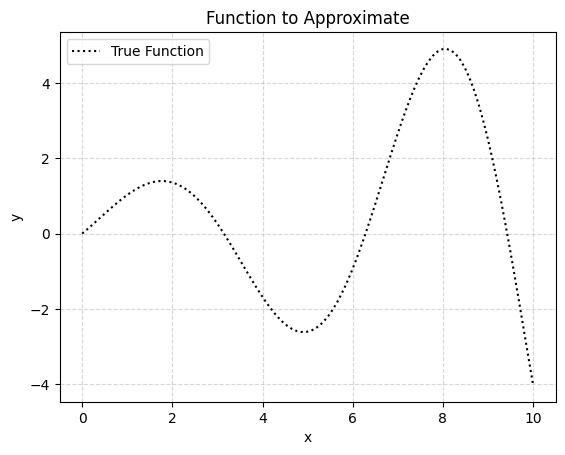

0.10101010101010101
9.8989898989899
100


In [27]:
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
# target function
def f(x):
    return np.sin(x)*np.exp(x/5)

x_values = np.linspace(0,10, 100)
y_values = f(x_values)

plot(x_values, y_values, ':', label="True Function", color='black')
# Plot training data

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function to Approximate")

# Legend
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

print(x_values[1])
print(x_values[-2])
print(len(x_values))

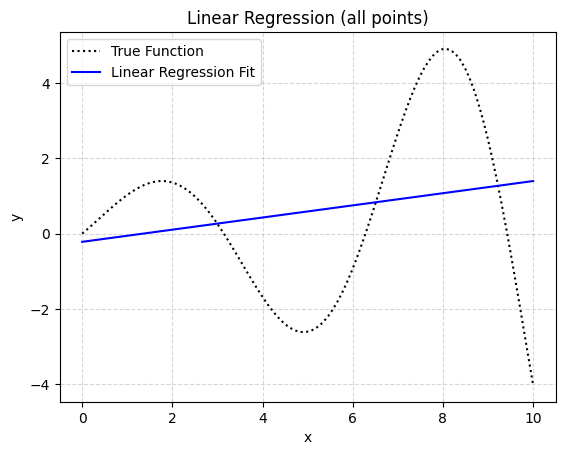

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Target function
def f(x):
    return np.sin(x) * np.exp(x / 5)

# Generate data
x_values = np.linspace(0, 10, 100)
y_values = f(x_values)

# Fit linear regression model
x_values_reshaped = x_values.reshape(-1, 1)  # Reshape for sklearn
model = LinearRegression()
model.fit(x_values_reshaped, y_values)
y_pred = model.predict(x_values_reshaped)

# Plot the true function
plt.plot(x_values, y_values, ':', label="True Function", color='black')

# Plot the linear regression line
plt.plot(x_values, y_pred, '-', label="Linear Regression Fit", color='blue')

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression (all points)")

# Legend
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


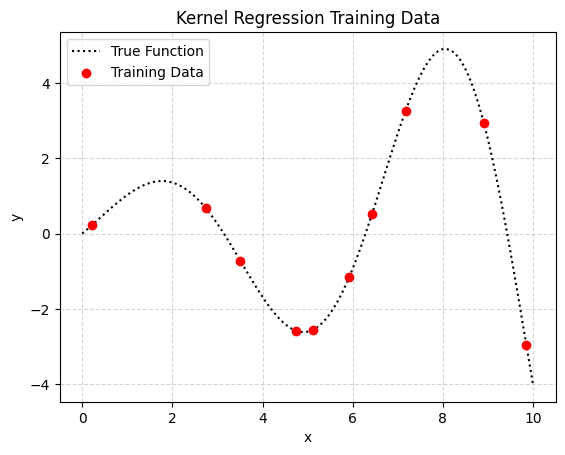

In [94]:
# gather some data points which we will fit to
import random
import matplotlib.pyplot as plt

n = 10 # number of points

random.seed(42069)
x_train = np.random.random(n)*n
y_train = f(x_train)

# Plot ground truth function

plot(x_values, y_values, ':', label="True Function", color='black')
# Plot training data
plt.scatter(x_train, y_train, color='red', label="Training Data", zorder=3)

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression Training Data")

# Legend
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

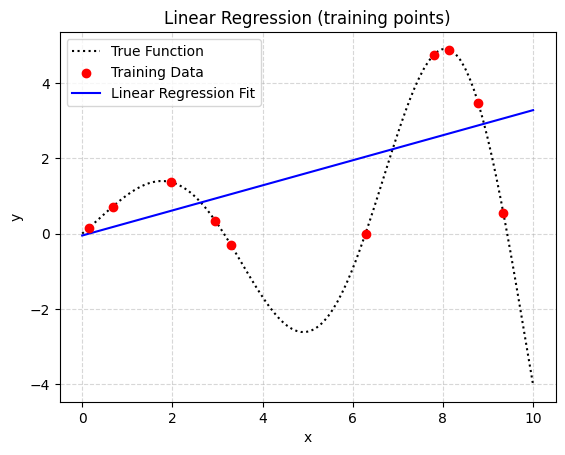

In [68]:
x_train_reshaped = x_train.reshape(-1, 1)
model_train = LinearRegression()
model_train.fit(x_train_reshaped, y_train)
y_pred_train = model_train.predict(x_values.reshape(-1, 1))

# Plot the true function
plt.plot(x_values, y_values, ':', label="True Function", color='black')

# Plot training data
plt.scatter(x_train, y_train, color='red', label="Training Data", zorder=3)

# Plot linear regression fit using training points
plt.plot(x_values, y_pred_train, '-', label="Linear Regression Fit", color='blue')

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression (training points)")

# Legend
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [80]:
# define a Gaussian kernel
sig = 1.0 # length scale
def kernel(x1, x2, sig):
    return np.exp(-(x1-x2)**2/(2*sig**2))

K = np.zeros((n,n))
# Now apply the formulas from the lecture to fill in the kernel matrix and 
# compute fitting coefficients. Use the function numpy.linalg.lstsq() to solve the linear problem K@c=y
# (look up its documentation, and don't forget that it returns 4 things, but you only need the solution vector)

lam = 0.1 # strength of regulariser

# now use your coefficients to predict the function on the xx array
# y = sum over n points of the c power of the kernel 

# construct the K matrix
K = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K[i,j] = kernel(x_train[i], x_train[j], sig)


# Construct the K_s matrix
K_s = np.zeros((len(x_values), len(x_train)))
for i in range(len(x_values)):
    for j in range(len(x_train)):
        K_s[i,j] = kernel(x_values[i], x_train[j], sig)


# Find the (regularised) c vector
c_reg, _, _, _ = np.linalg.lstsq(K + lam * np.eye(n), y_train, rcond=None)  # Regularized K


y_pred = K_s @ c_reg




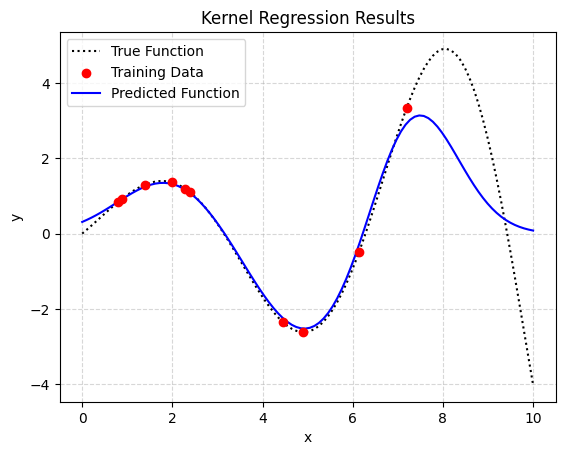

In [81]:
import matplotlib.pyplot as plt 

# Plot ground truth function
plt.plot(x_values, y_values, ':', label="True Function", color='black')

# Plot training data
plt.scatter(x_train, y_train, color='red', label="Training Data", zorder=3)

# Plot predicted function
plt.plot(x_values, y_pred, label="Predicted Function", color='blue')

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression Results")

# Legend
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


Task 1
--

Using now explore the predictions by varying
- the lengthscale sig between 0.1 and 10,
- the regularisation strength lam between 0.001 and 2, 
- the number of data points between 1 and 20

Give a summary of your findings, including the interplay between the above parameters!

Hence, we have clarified that our function returns the _exact_ same function as the script for task 1. We may proceed.

To answer the question above, we should
- run a hyperparameter sweep over the above hyperparameters
- plot lengthscale v regularisation strength
- plot the interplay for different data points

So we have a set number of 
- x_values: np.linspace(0,10, 100)
- y_values: f(xx)
- x_train: inducing points 
So we can think of xx and yy as our 'ground truth' function.

We have to go through our approximation and test three different parameters:
- number of points we are using for interpolation
- lengthscale ($\sigma$)
- regularisation ($\lambda$)


Lets set up a function using our code above to easily run *kernel ridge regression*.

In [36]:
# We will make our function as general as possible to try and scaffold as much understanding as possible
# when, later, we are worried about computational efficiency, we will perform less in this loop, factoring out as much as possible

def kernel_ridge_regression(x_values, y_values, n_inducing_points, sig, lam, func, x_train, use_x_train):

    x_values = x_values # this is our full dataset

    n_points = len(x_values) # number of samples in our dataset

    y_values = func(x_values) # this is our dependent variable - what we are trying to predict

    if use_x_train == False:

        x_train = np.random.choice(x_values, n_inducing_points, replace=False) # getting our x_train

    else:

        n_inducing_points = len(x_train)

    y_train = func(x_train) # setting our y_train values


    # Training Kernel
    K = np.zeros((n_inducing_points,n_inducing_points))

    for i in range(n_inducing_points):
        for j in range(n_inducing_points):
            K[i,j] = kernel(x_train[i], x_train[j], sig) # kernel func between training points

    # Cross-kernel
    K_s= np.zeros((n_points, n_inducing_points))

    for i in range(n_points):
        for j in range(n_inducing_points):
            K_s[i,j] = kernel(x_values[i], x_train[j], sig) # kernel between data and training points

    c, _, _, _ = np.linalg.lstsq(K + lam * np.eye(n_inducing_points), y_train, rcond=None)  # Regularized K

    y_pred = K_s @ c

    return y_pred, x_train

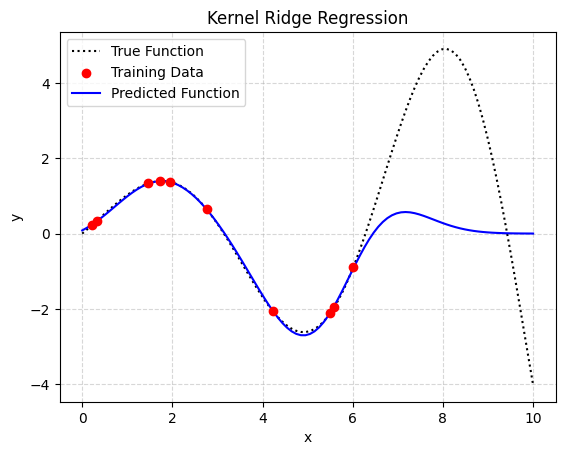

In [51]:
# Testing our function to see if it works the same as previously 

# Plot ground truth function
plt.plot(x_values, y_values, ':', label="True Function", color='black')

x_train = np.random.random(n)*n

y_pred, x_train = kernel_ridge_regression(x_values, y_values, 10, 1, 0.01, f, x_train, use_x_train=True)

# Plot training data
plt.scatter(x_train, f(x_train), color='red', label="Training Data", zorder=3)


# Plot predicted function
plt.plot(x_values, y_pred, label="Predicted Function", color='blue')

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Ridge Regression")

# Legend
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [143]:
import itertools as tools
import pandas as pd 

# Define new parameter ranges
sig_values = [0.1, 0.5, 1, 2, 5, 10]  # Lengthscale
lam_values = [0.001, 0.01, 0.1, 1, 2]  # Regularization strength
n_values = [1, 2, 5, 10, 15, 20]  # Number of training points

# Full dataset
x_values = np.linspace(0, 10, 100)
y_values = f(x_values)

# Initialize list to store results before creating DataFrame
results_list = []

# Loop through hyperparameter combinations
for n in n_values:

    x_train = np.random.random(n) * 10  # Setting same points for each hyperparam loop  

    for sig in sig_values:
        for lam in lam_values:

            y_pred, x_train = kernel_ridge_regression(x_values, y_values, n, sig, lam, f, x_train, True)

            mse = np.mean((y_pred - y_values) ** 2)  # MSE
            rmse = np.sqrt(mse)  # RMSE

            # Append results to list
            results_list.append({
                'Lengthscale (σ)': sig,
                'Regularization (λ)': lam,
                'Num Points (n)': n,
                'Predictions (y_pred)': y_pred,  # Storing the entire prediction vector
                'MSE': mse,
                'RMSE': rmse,
                'x_train': x_train
            })

# Convert list to DataFrame
results = pd.DataFrame(results_list)


In [144]:
from IPython.display import display

# Convert list to DataFrame
results = pd.DataFrame(results_list)

# Display the results DataFrame
display(results)  # Works in Jupyter Notebook

# If using a script, you can also print a preview
print(results.head())  # Shows first 5 rows

Lengthscale (σ)  Regularization (λ)  Num Points (n)  \
0                0.1               0.001               1   
1                0.1               0.010               1   
2                0.1               0.100               1   
3                0.1               1.000               1   
4                0.1               2.000               1   
..               ...                 ...             ...   
175             10.0               0.001              20   
176             10.0               0.010              20   
177             10.0               0.100              20   
178             10.0               1.000              20   
179             10.0               2.000              20   

                                  Predictions (y_pred)       MSE      RMSE  \
0    [1.609641140740646e-113, 9.69684520126974e-104...  5.385280  2.320621   
1    [1.5952978038429573e-113, 9.610437669773276e-1...  5.385464  2.320660   
2    [1.464773438073988e-113, 8.824129133155462e-10...  5.387321  2.321060   
3    [8.056253909406933e-114, 4.853271023235504e-10...  5.401741  2.324165   
4    [5.370835939604622e-114, 3.235514015490336e-10...  5.410031  2.325947   
..                                                 ...       ...       ...   
175  [1.3224924769911013, 1.217787578450043, 1.1160...  4.049643  2.012372   
176  [0.8660672984700568, 0.8134995954298461, 0.762...  4.460844  2.112071   
177  [0.35835717563992375, 0.34706805073176383, 0.3...  4.675746  2.162347   
178  [0.2318806698637621, 0.23736026618592865, 0.24...  4.891312  2.211631   
179  [0.2804736342457206, 0.28566173994706623, 0.29...  4.945808  2.223917   

                                               x_train  
0                                 [2.2798915125697086]  
1                                 [2.2798915125697086]  
2                                 [2.2798915125697086]  
3                                 [2.2798915125697086]  
4                                 [2.2798915125697086]  
..                                                 ...  
175  [7.457689640776795, 3.0277125291763207, 6.8441...  
176  [7.457689640776795, 3.0277125291763207, 6.8441...  
177  [7.457689640776795, 3.0277125291763207, 6.8441...  
178  [7.457689640776795, 3.0277125291763207, 6.8441...  
179  [7.457689640776795, 3.0277125291763207, 6.8441...  

[180 rows x 7 columns]

   Lengthscale (σ)  Regularization (λ)  Num Points (n)  \
0              0.1               0.001               1   
1              0.1               0.010               1   
2              0.1               0.100               1   
3              0.1               1.000               1   
4              0.1               2.000               1   

                                Predictions (y_pred)       MSE      RMSE  \
0  [1.609641140740646e-113, 9.69684520126974e-104...  5.385280  2.320621   
1  [1.5952978038429573e-113, 9.610437669773276e-1...  5.385464  2.320660   
2  [1.464773438073988e-113, 8.824129133155462e-10...  5.387321  2.321060   
3  [8.056253909406933e-114, 4.853271023235504e-10...  5.401741  2.324165   
4  [5.370835939604622e-114, 3.235514015490336e-10...  5.410031  2.325947   

                x_train  
0  [2.2798915125697086]  
1  [2.2798915125697086]  
2  [2.2798915125697086]  
3  [2.2798915125697086]  
4  [2.2798915125697086]  


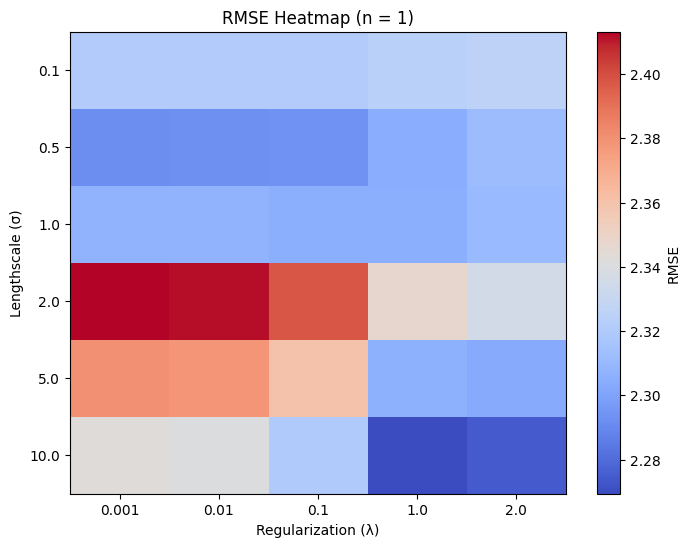

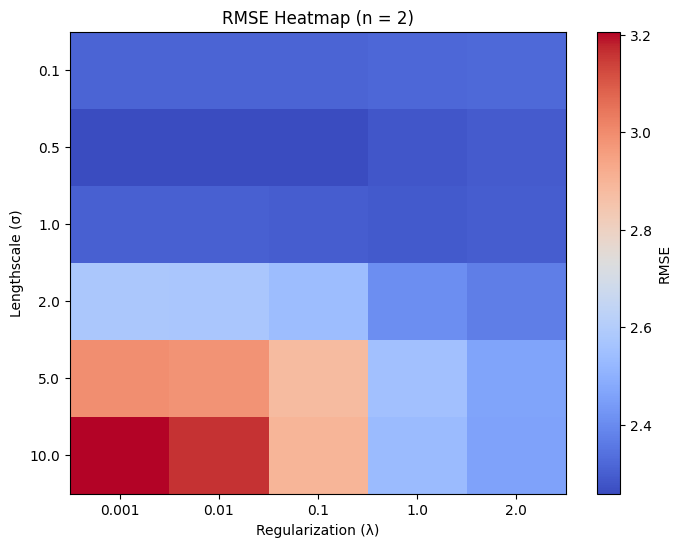

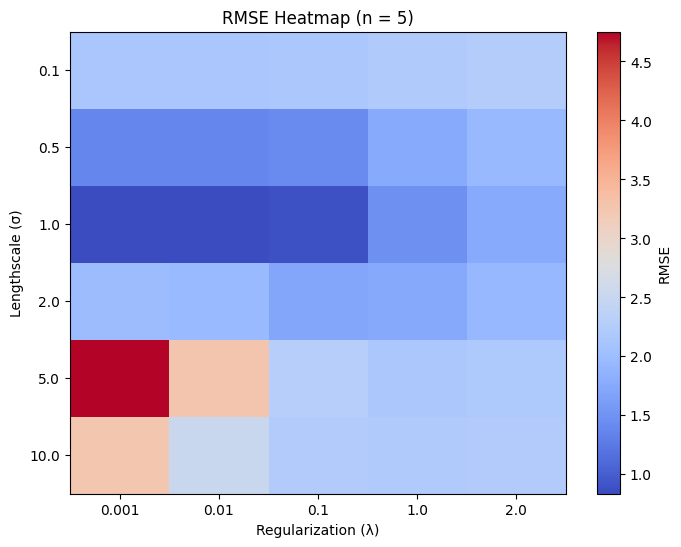

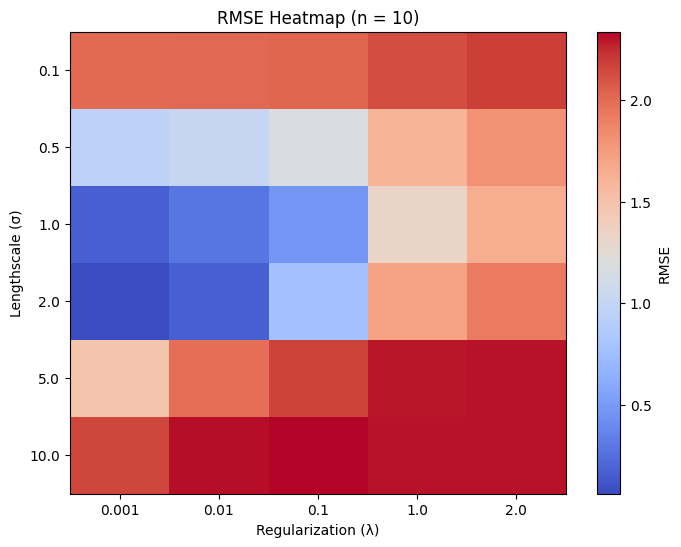

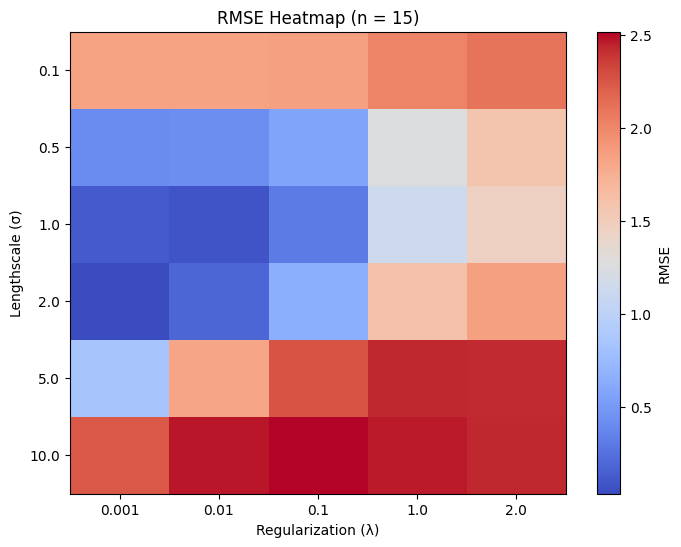

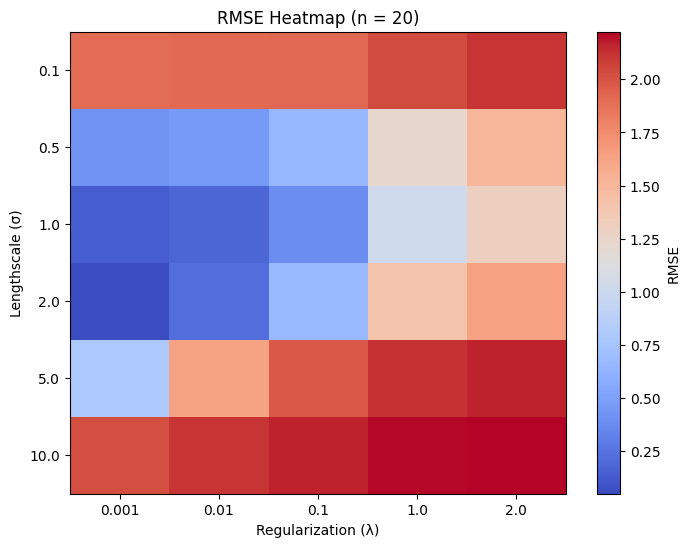

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique values of n
n_unique = results["Num Points (n)"].unique()

# Create heatmaps for each n
for n in n_unique:
    subset = results[results["Num Points (n)"] == n]

    # Pivot the data into a 2D array
    sig_values = np.sort(subset["Lengthscale (σ)"].unique())
    lam_values = np.sort(subset["Regularization (λ)"].unique())

    mse_matrix = np.zeros((len(sig_values), len(lam_values)))

    for i, sig in enumerate(sig_values):
        for j, lam in enumerate(lam_values):
            mse_matrix[i, j] = subset[(subset["Lengthscale (σ)"] == sig) & 
                                      (subset["Regularization (λ)"] == lam)]["RMSE"].values[0]

    # Create heatmap using Matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.imshow(mse_matrix, cmap="coolwarm", aspect="auto")

    # Labels and ticks
    ax.set_xticks(np.arange(len(lam_values)))
    ax.set_yticks(np.arange(len(sig_values)))
    ax.set_xticklabels(lam_values)
    ax.set_yticklabels(sig_values)
    ax.set_xlabel("Regularization (λ)")
    ax.set_ylabel("Lengthscale (σ)")
    ax.set_title(f"RMSE Heatmap (n = {n})")

    # Colorbar
    fig.colorbar(cax, label="RMSE")

    # Show the heatmap
    plt.show()


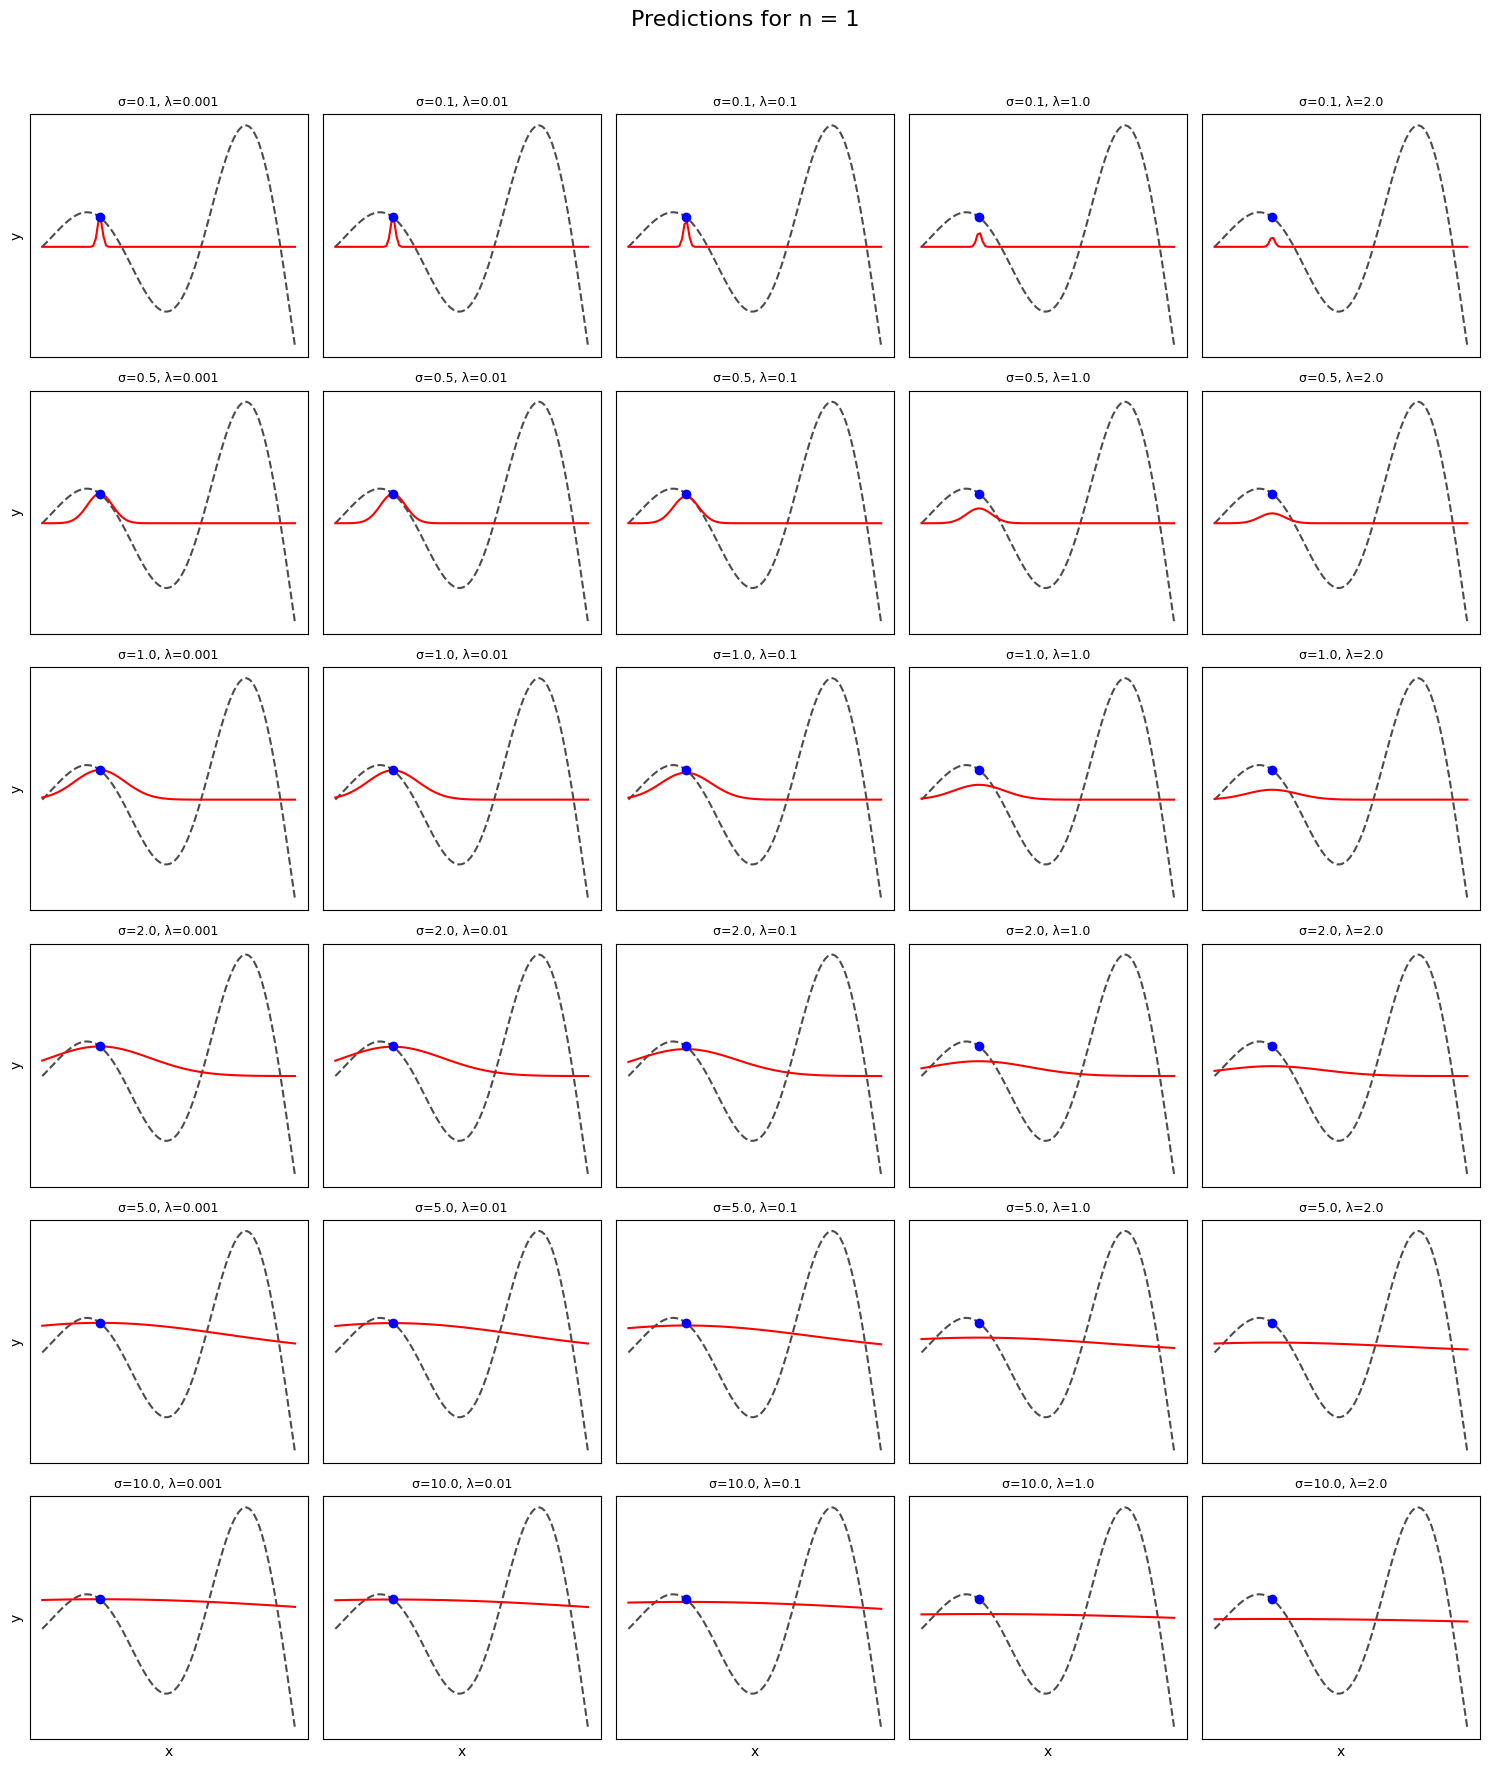

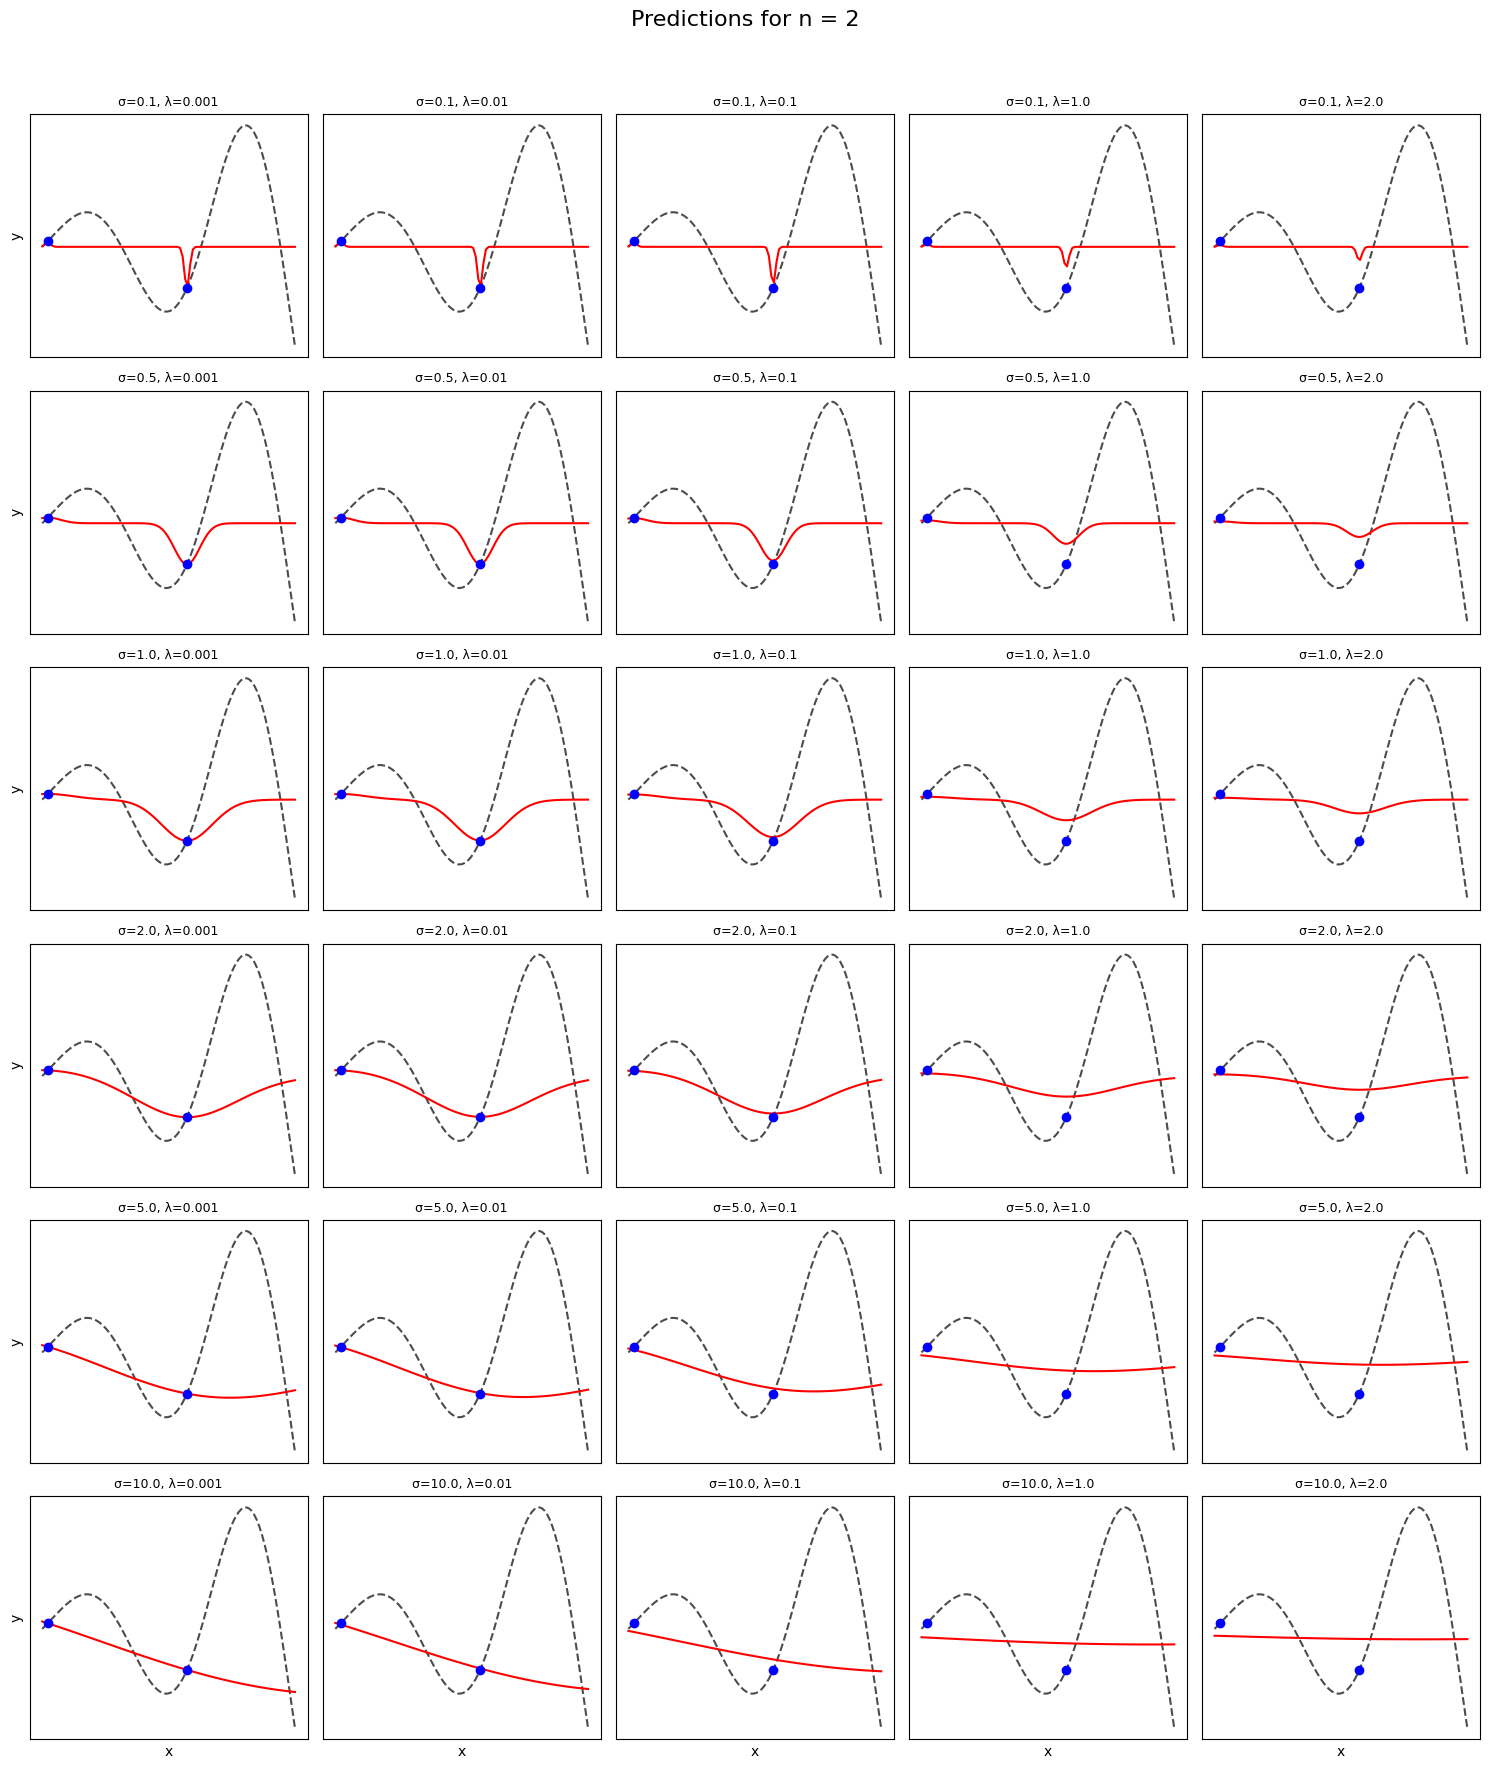

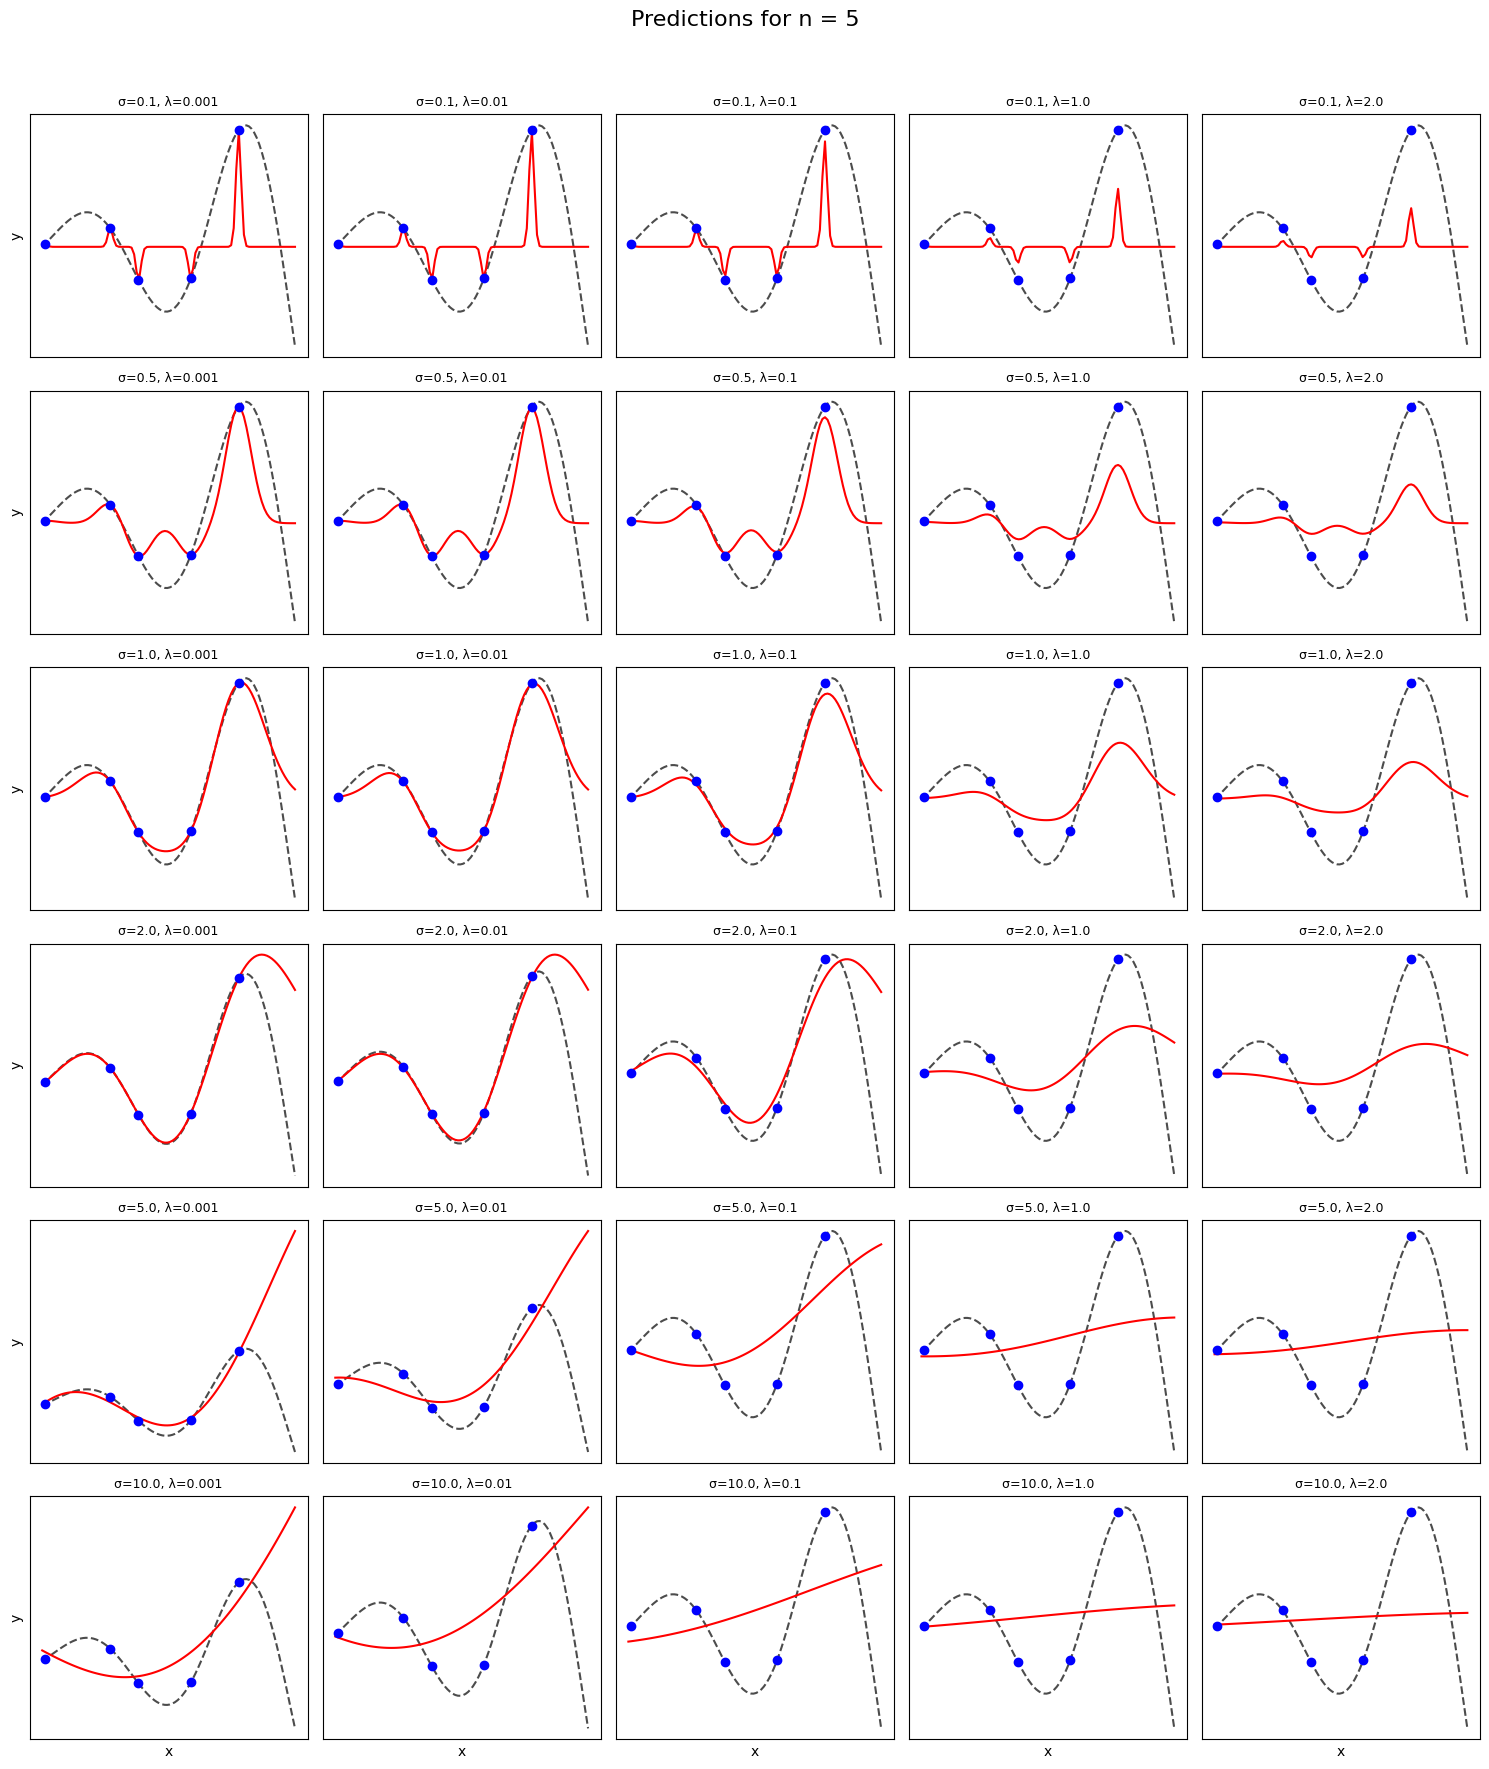

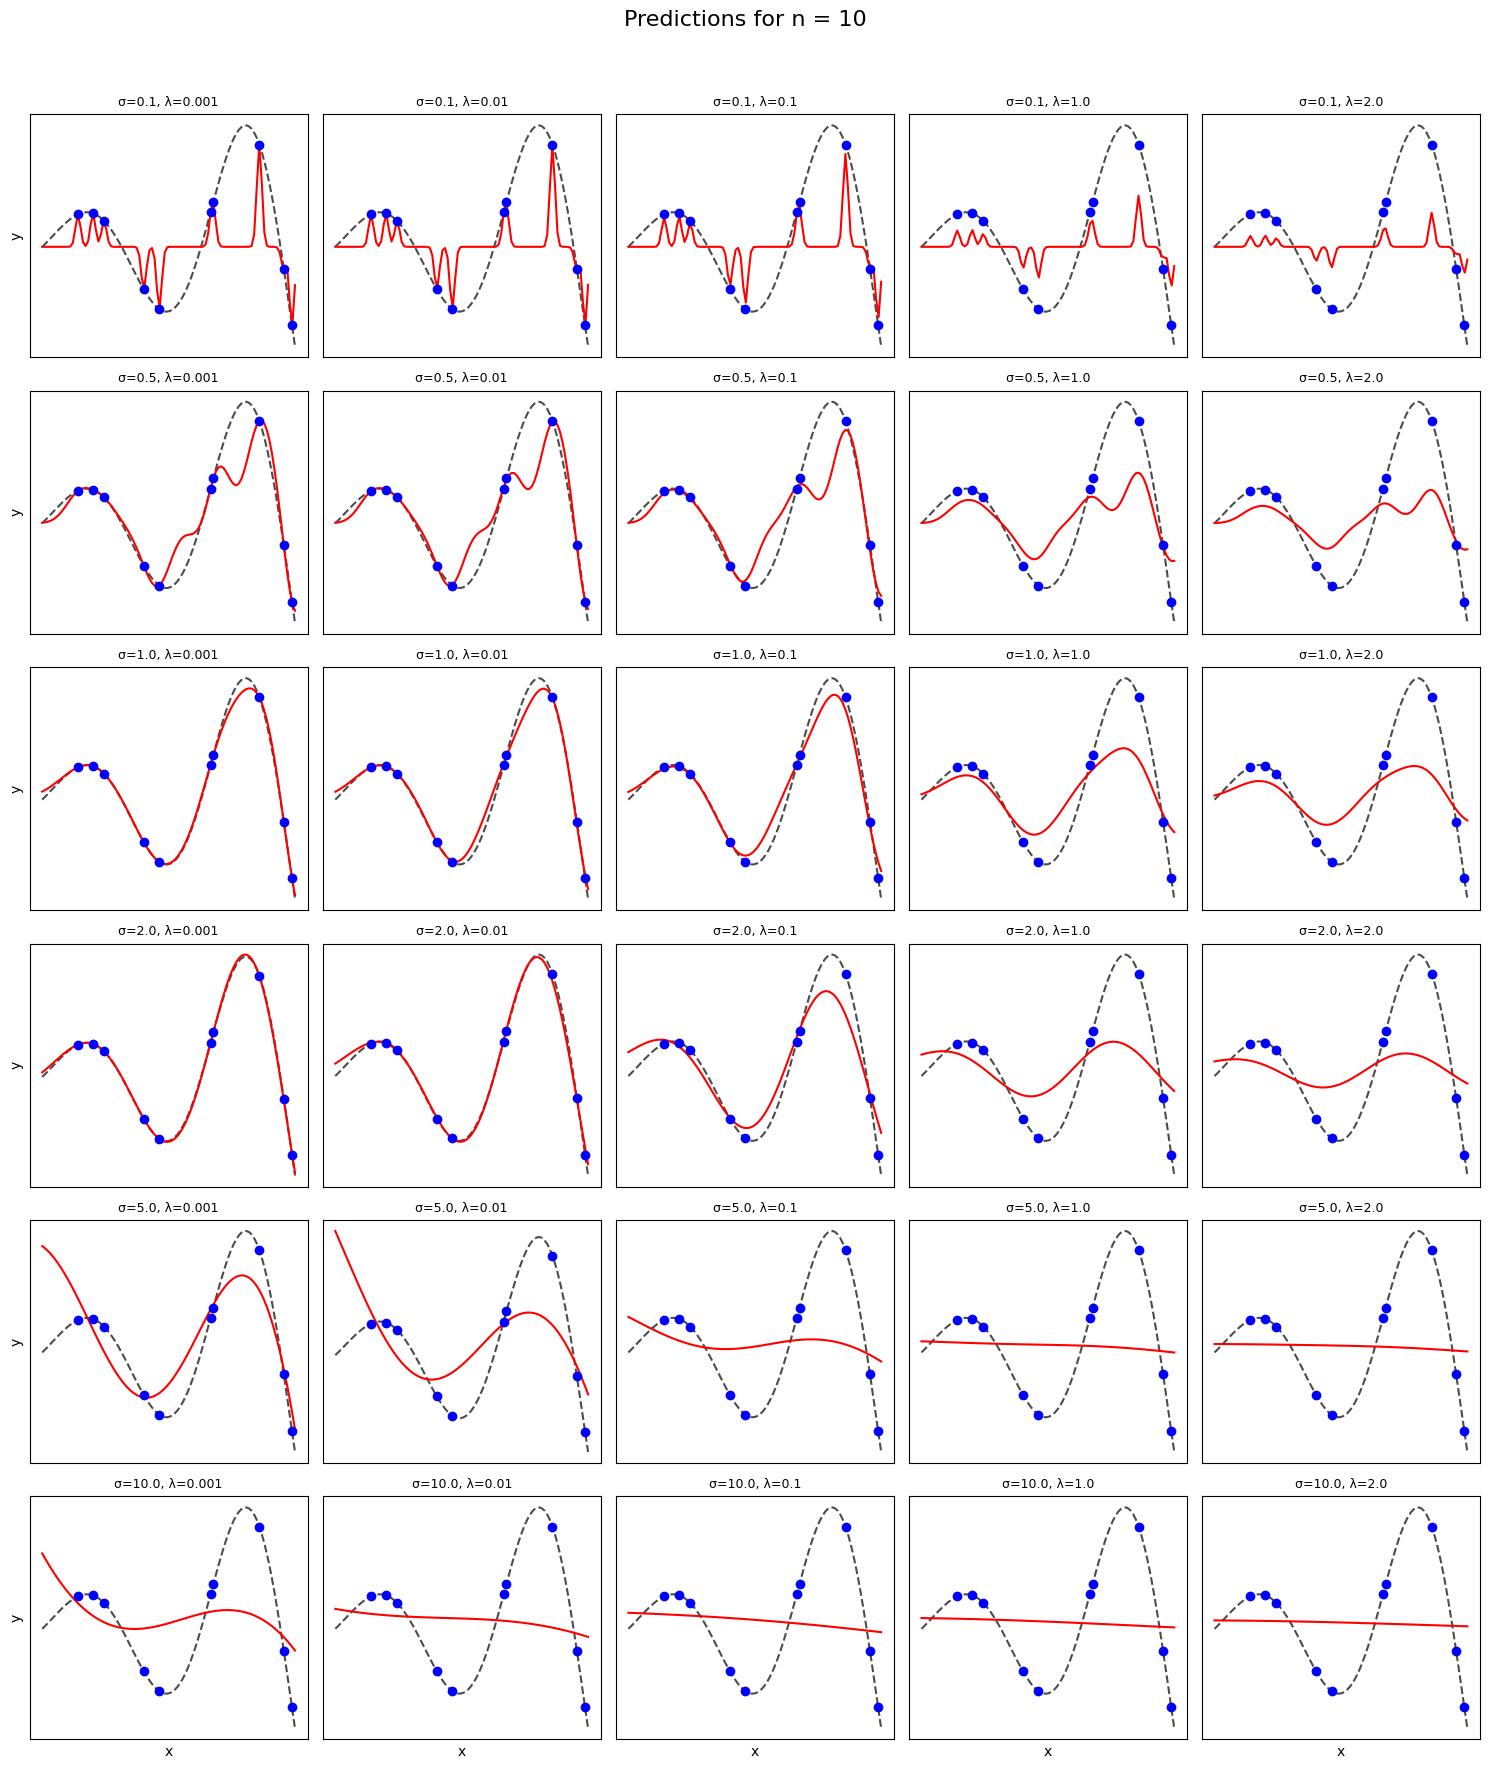

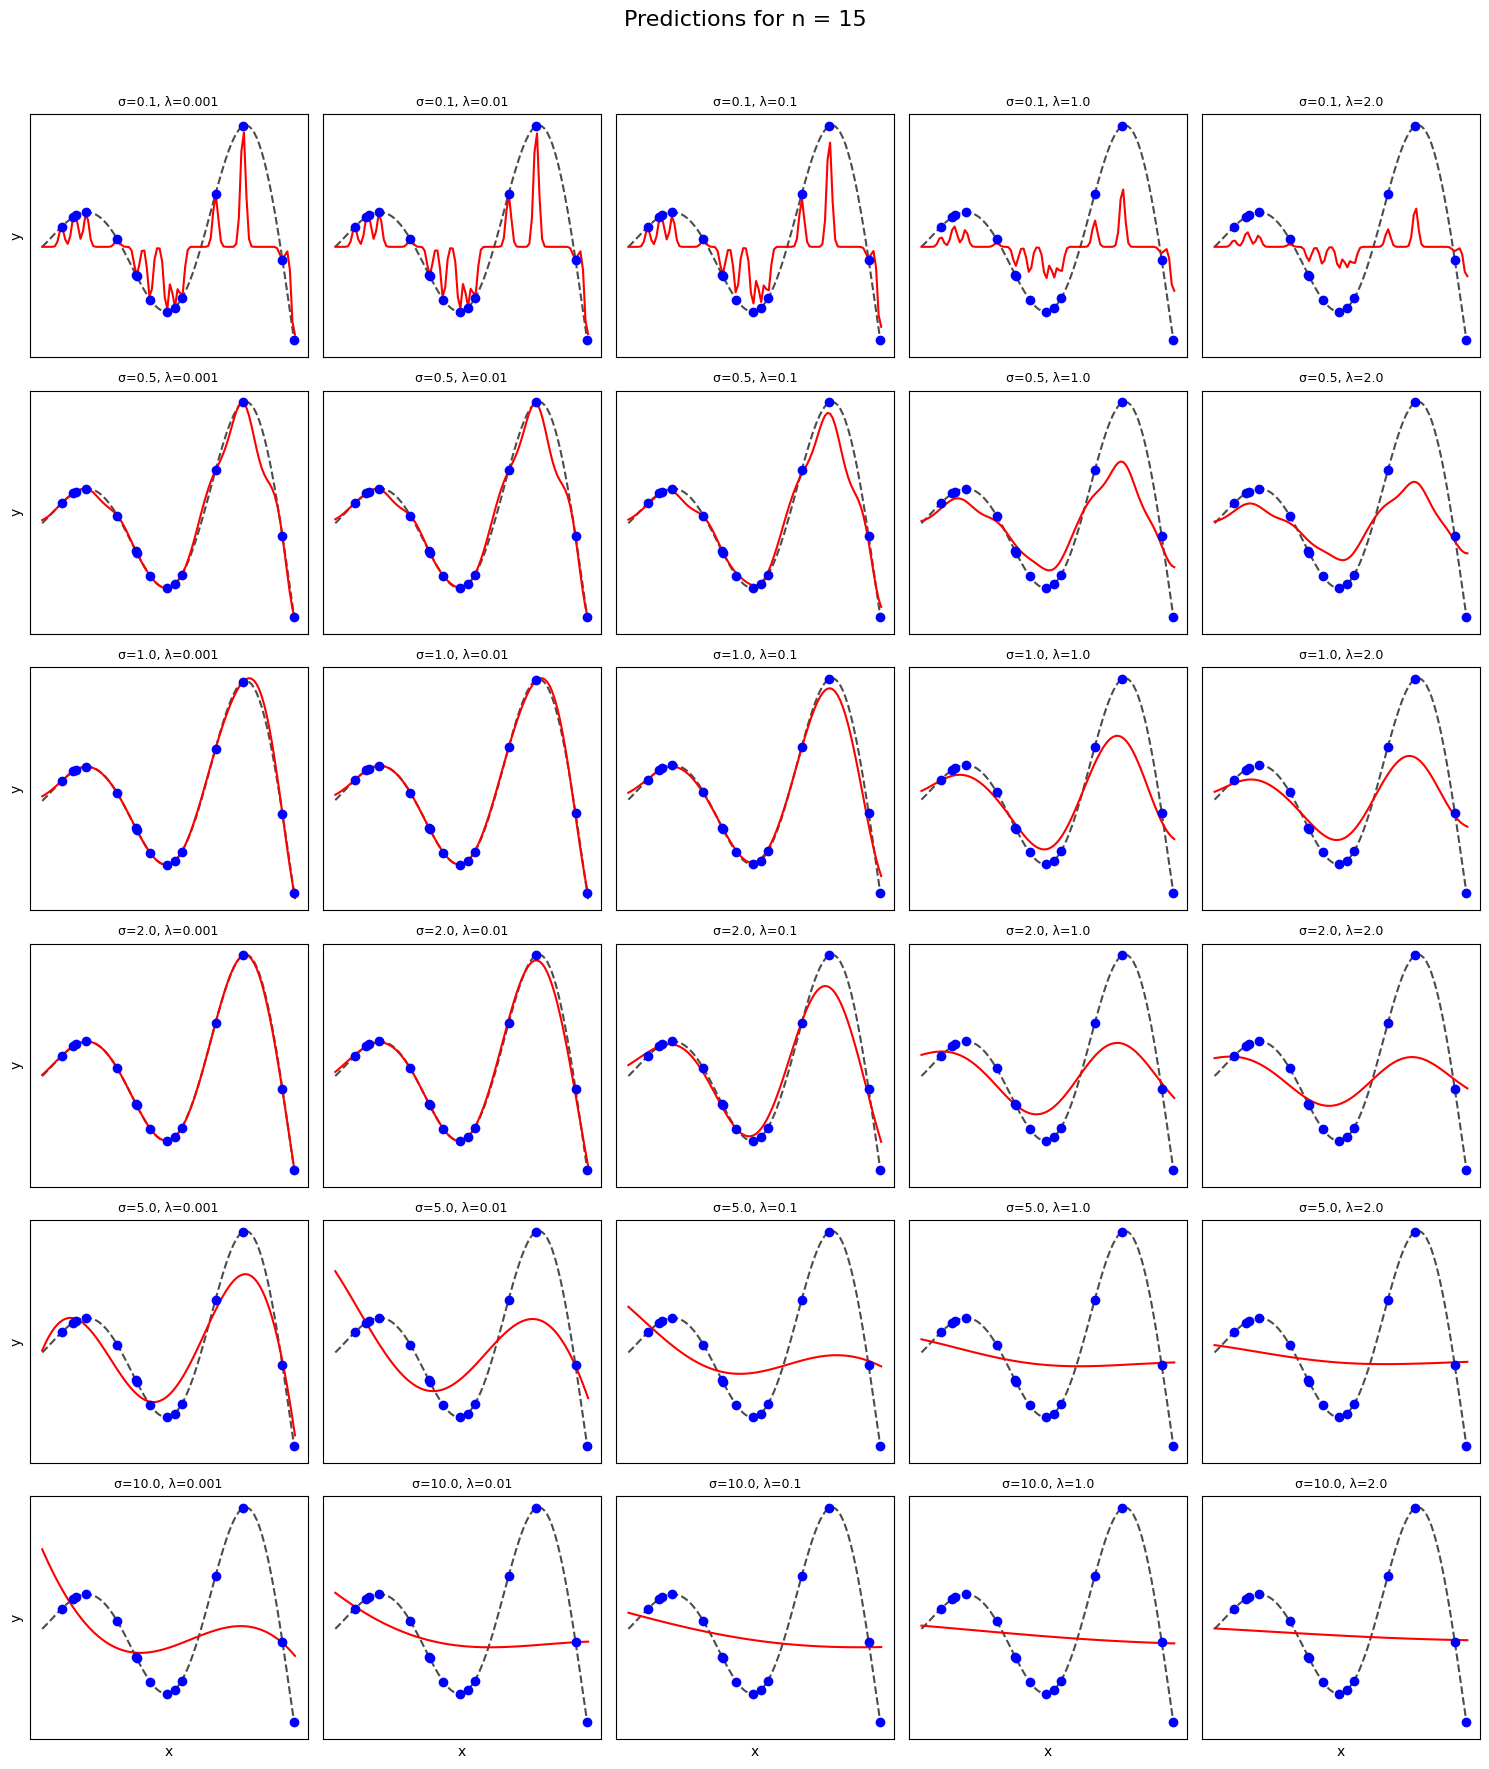

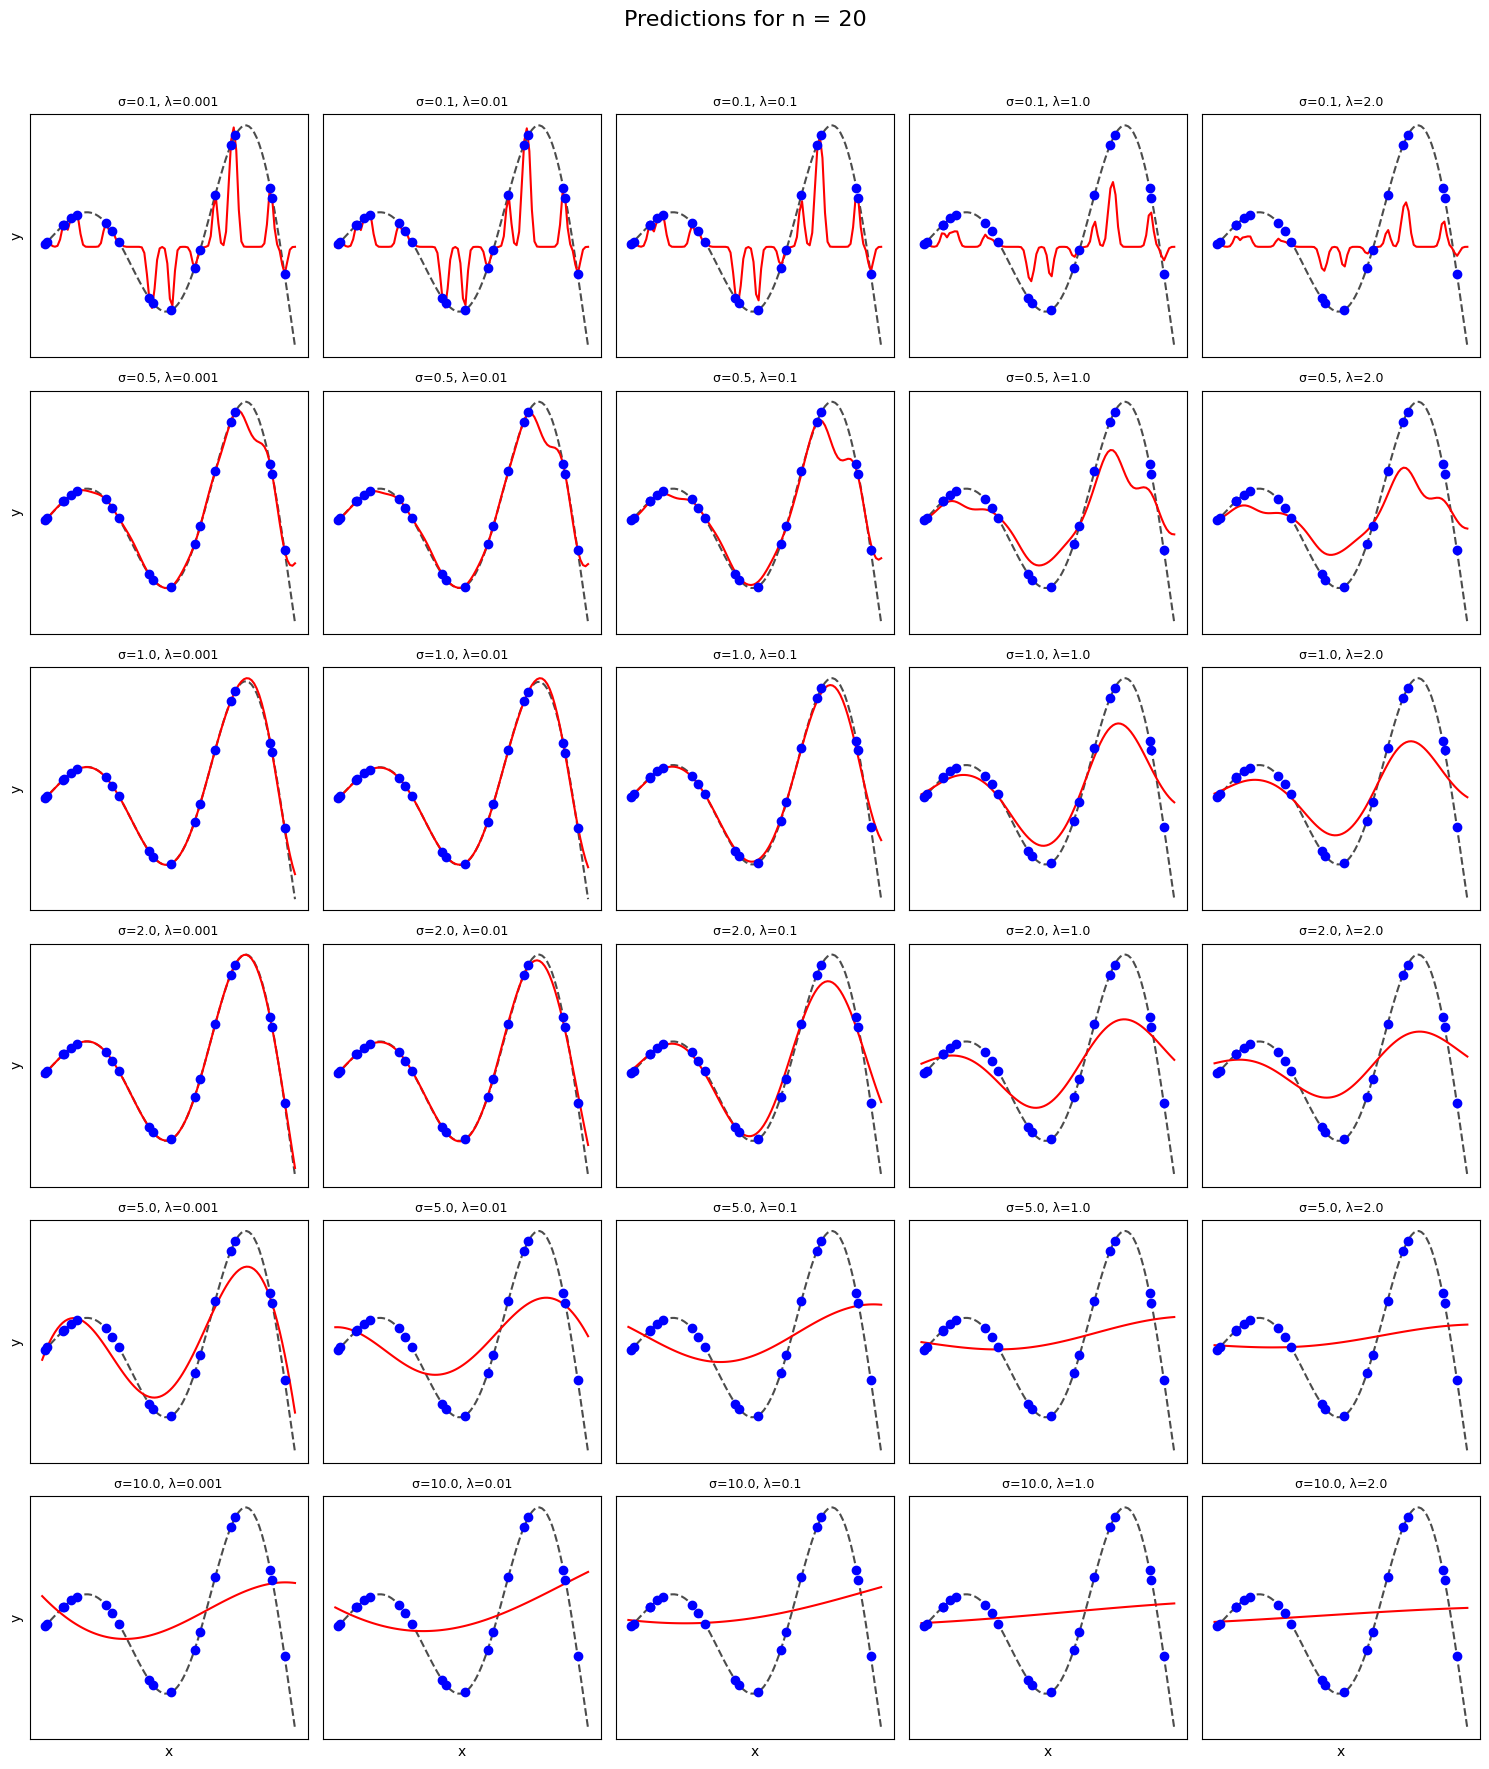

In [146]:
import matplotlib.pyplot as plt

# Unique values of n, sig, and lam
n_unique = results["Num Points (n)"].unique()
sig_values = np.sort(results["Lengthscale (σ)"].unique())
lam_values = np.sort(results["Regularization (λ)"].unique())

# Full dataset (ground truth)
x_values = np.linspace(0, 10, 100)
y_values = f(x_values)  # True function

# Loop through each training data size (n)
for n in n_unique:
    fig, axes = plt.subplots(nrows=len(sig_values), ncols=len(lam_values), figsize=(15, 18))
    fig.suptitle(f"Predictions for n = {n}", fontsize=16)

    for i, sig in enumerate(sig_values):
        for j, lam in enumerate(lam_values):
            # Select the corresponding result
            subset = results[
                (results["Num Points (n)"] == n) &
                (results["Lengthscale (σ)"] == sig) &
                (results["Regularization (λ)"] == lam)
            ]
            
            if not subset.empty:
                y_pred = subset["Predictions (y_pred)"].values[0]  # Extract predictions
                x_train = subset["x_train"].values[0]  # Extract training x-values
                y_train = f(x_train)  # Compute training y-values using the true function
                
                ax = axes[i, j]
                ax.plot(x_values, y_values, label="True Function", color="black", linestyle="dashed", alpha=0.7)
                ax.plot(x_values, y_pred, label="Predicted", color="red")
                ax.scatter(x_train, y_train, color="blue", marker="o", label="Training Points", zorder=3)

                # Titles and labels
                ax.set_title(f"σ={sig}, λ={lam}", fontsize=9)
                ax.set_xticks([])
                ax.set_yticks([])

                # Reduce clutter by only showing some axis labels
                if i == len(sig_values) - 1:
                    ax.set_xlabel("x")
                if j == 0:
                    ax.set_ylabel("y")

    # Adjust layout and show
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


Optional Extension - Noisy Data
----

Investigate what happens when you add i.i.d random noise of a certain size to the _data values_ that you
fit to (But still of course plot the original function without noise to compare with, as well as the data points
with noise added).

In [119]:
def kernel_ridge_regression_with_noise(
    x_values, n_inducing_points, sig, lam, func, x_train, y_train_noisy
):
    """
    We remove 'noise_std' and 'use_x_train' as arguments, 
    and assume y_train_noisy is already computed outside.
    """
    # x_values, y_values, etc. might not even be needed if you only 
    # use them for shape or for K_s. Adjust to your needs.

    n_points = len(x_values)
    # This part is the same
    K = np.zeros((n_inducing_points, n_inducing_points))
    for i in range(n_inducing_points):
        for j in range(n_inducing_points):
            K[i, j] = kernel(x_train[i], x_train[j], sig)

    # Cross-kernel
    K_s = np.zeros((n_points, n_inducing_points))
    for i in range(n_points):
        for j in range(n_inducing_points):
            K_s[i, j] = kernel(x_values[i], x_train[j], sig)

    # Solve for c using the noisy y_train
    c, _, _, _ = np.linalg.lstsq(
        K + lam * np.eye(n_inducing_points), y_train_noisy, rcond=None
    )
    y_pred = K_s @ c

    return y_pred


In [122]:
sig_values = [0.1, 0.5, 1, 2, 5, 10]   # Lengthscale
lam_values = [0.001, 0.01, 0.1, 1, 2]  # Regularization strength
n_values = [1, 2, 5, 10, 15, 20]       # Number of training points

np.random.seed(42049)  # Fix the random seed for reproducibility

# Full "ground truth" dataset
x_values = np.linspace(0, 10, 100)
y_values = f(x_values)   # f(...) is your true function

# Initialize a list to store results
results_list = []

# Loop over different training set sizes
for n in n_values:
    # Generate one random set of training points for this n
    x_train = np.random.random(n) * 10
    y_train = f(x_train)

    # Generate *one* noise vector for this n
    noise = np.random.normal(0, 0.5, size=y_train.shape)
    y_train_noisy = y_train + noise

    # Now loop over all sigma-lambda combinations
    for sig in sig_values:
        for lam in lam_values:
            
            # Use the function with the new signature
            y_pred = kernel_ridge_regression_with_noise(
                x_values=x_values,
                n_inducing_points=n,
                sig=sig,
                lam=lam,
                func=f,
                x_train=x_train,
                y_train_noisy=y_train_noisy
            )

            # Compute MSE/RMSE relative to the true function
            mse = np.mean((y_pred - y_values) ** 2)
            rmse = np.sqrt(mse)

            # Append results to list
            results_list.append({
                'Lengthscale (σ)': sig,
                'Regularization (λ)': lam,
                'Num Points (n)': n,
                'Predictions (y_pred)': y_pred,
                'MSE': mse,
                'RMSE': rmse,
                'x_train': x_train,            # Just so you have it
                'y_train_noisy': y_train_noisy # Just so you have it
            })

# Convert list to DataFrame
results = pd.DataFrame(results_list)

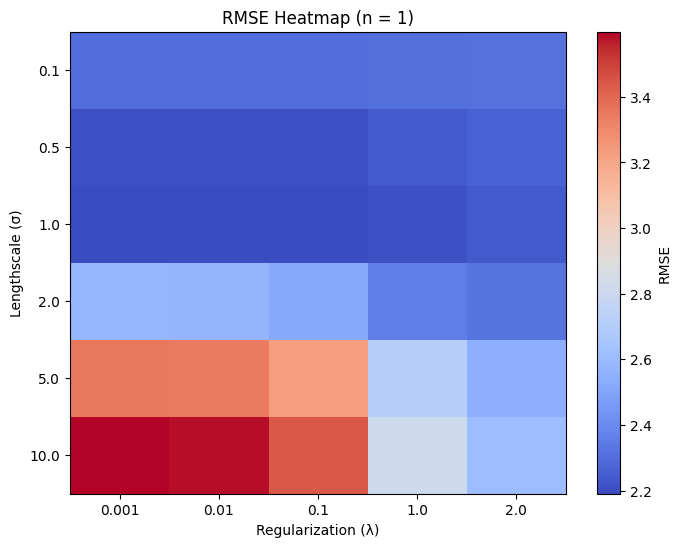

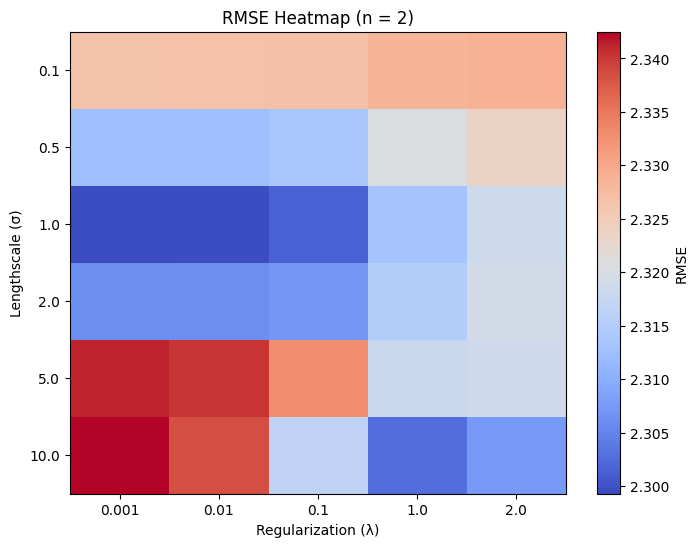

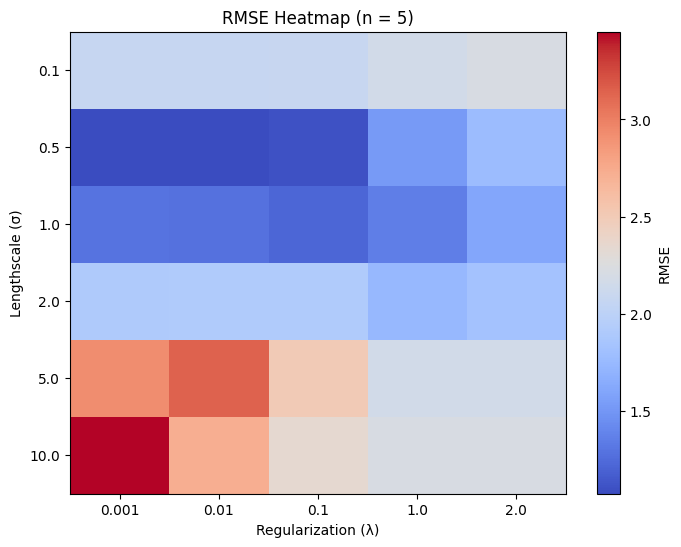

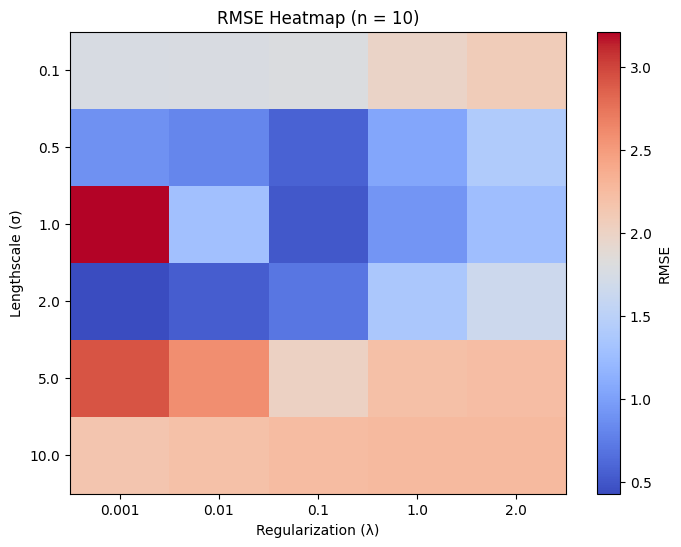

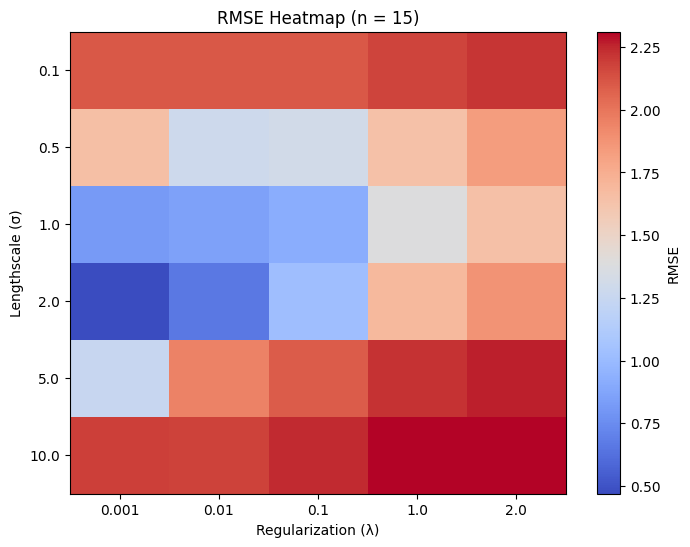

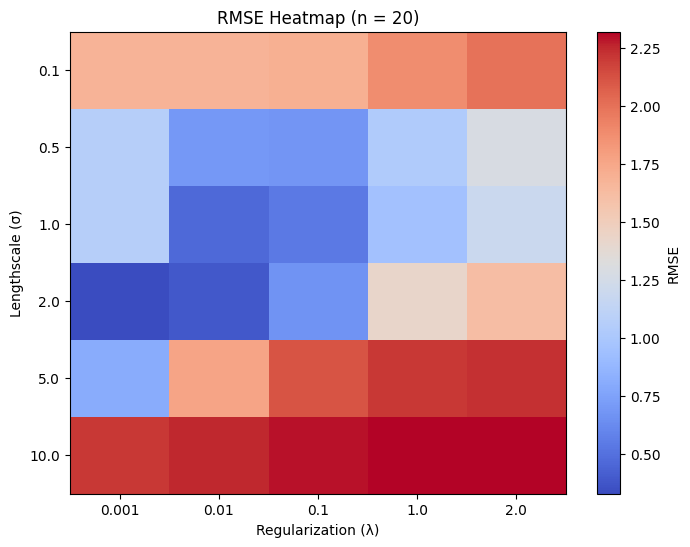

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique values of n
n_unique = results["Num Points (n)"].unique()

# Create heatmaps for each n
for n in n_unique:
    subset = results[results["Num Points (n)"] == n]

    # Pivot the data into a 2D array
    sig_values = np.sort(subset["Lengthscale (σ)"].unique())
    lam_values = np.sort(subset["Regularization (λ)"].unique())

    mse_matrix = np.zeros((len(sig_values), len(lam_values)))

    for i, sig in enumerate(sig_values):
        for j, lam in enumerate(lam_values):
            mse_matrix[i, j] = subset[(subset["Lengthscale (σ)"] == sig) & 
                                      (subset["Regularization (λ)"] == lam)]["RMSE"].values[0]

    # Create heatmap using Matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.imshow(mse_matrix, cmap="coolwarm", aspect="auto")

    # Labels and ticks
    ax.set_xticks(np.arange(len(lam_values)))
    ax.set_yticks(np.arange(len(sig_values)))
    ax.set_xticklabels(lam_values)
    ax.set_yticklabels(sig_values)
    ax.set_xlabel("Regularization (λ)")
    ax.set_ylabel("Lengthscale (σ)")
    ax.set_title(f"RMSE Heatmap (n = {n})")

    # Colorbar
    fig.colorbar(cax, label="RMSE")

    # Show the heatmap
    plt.show()


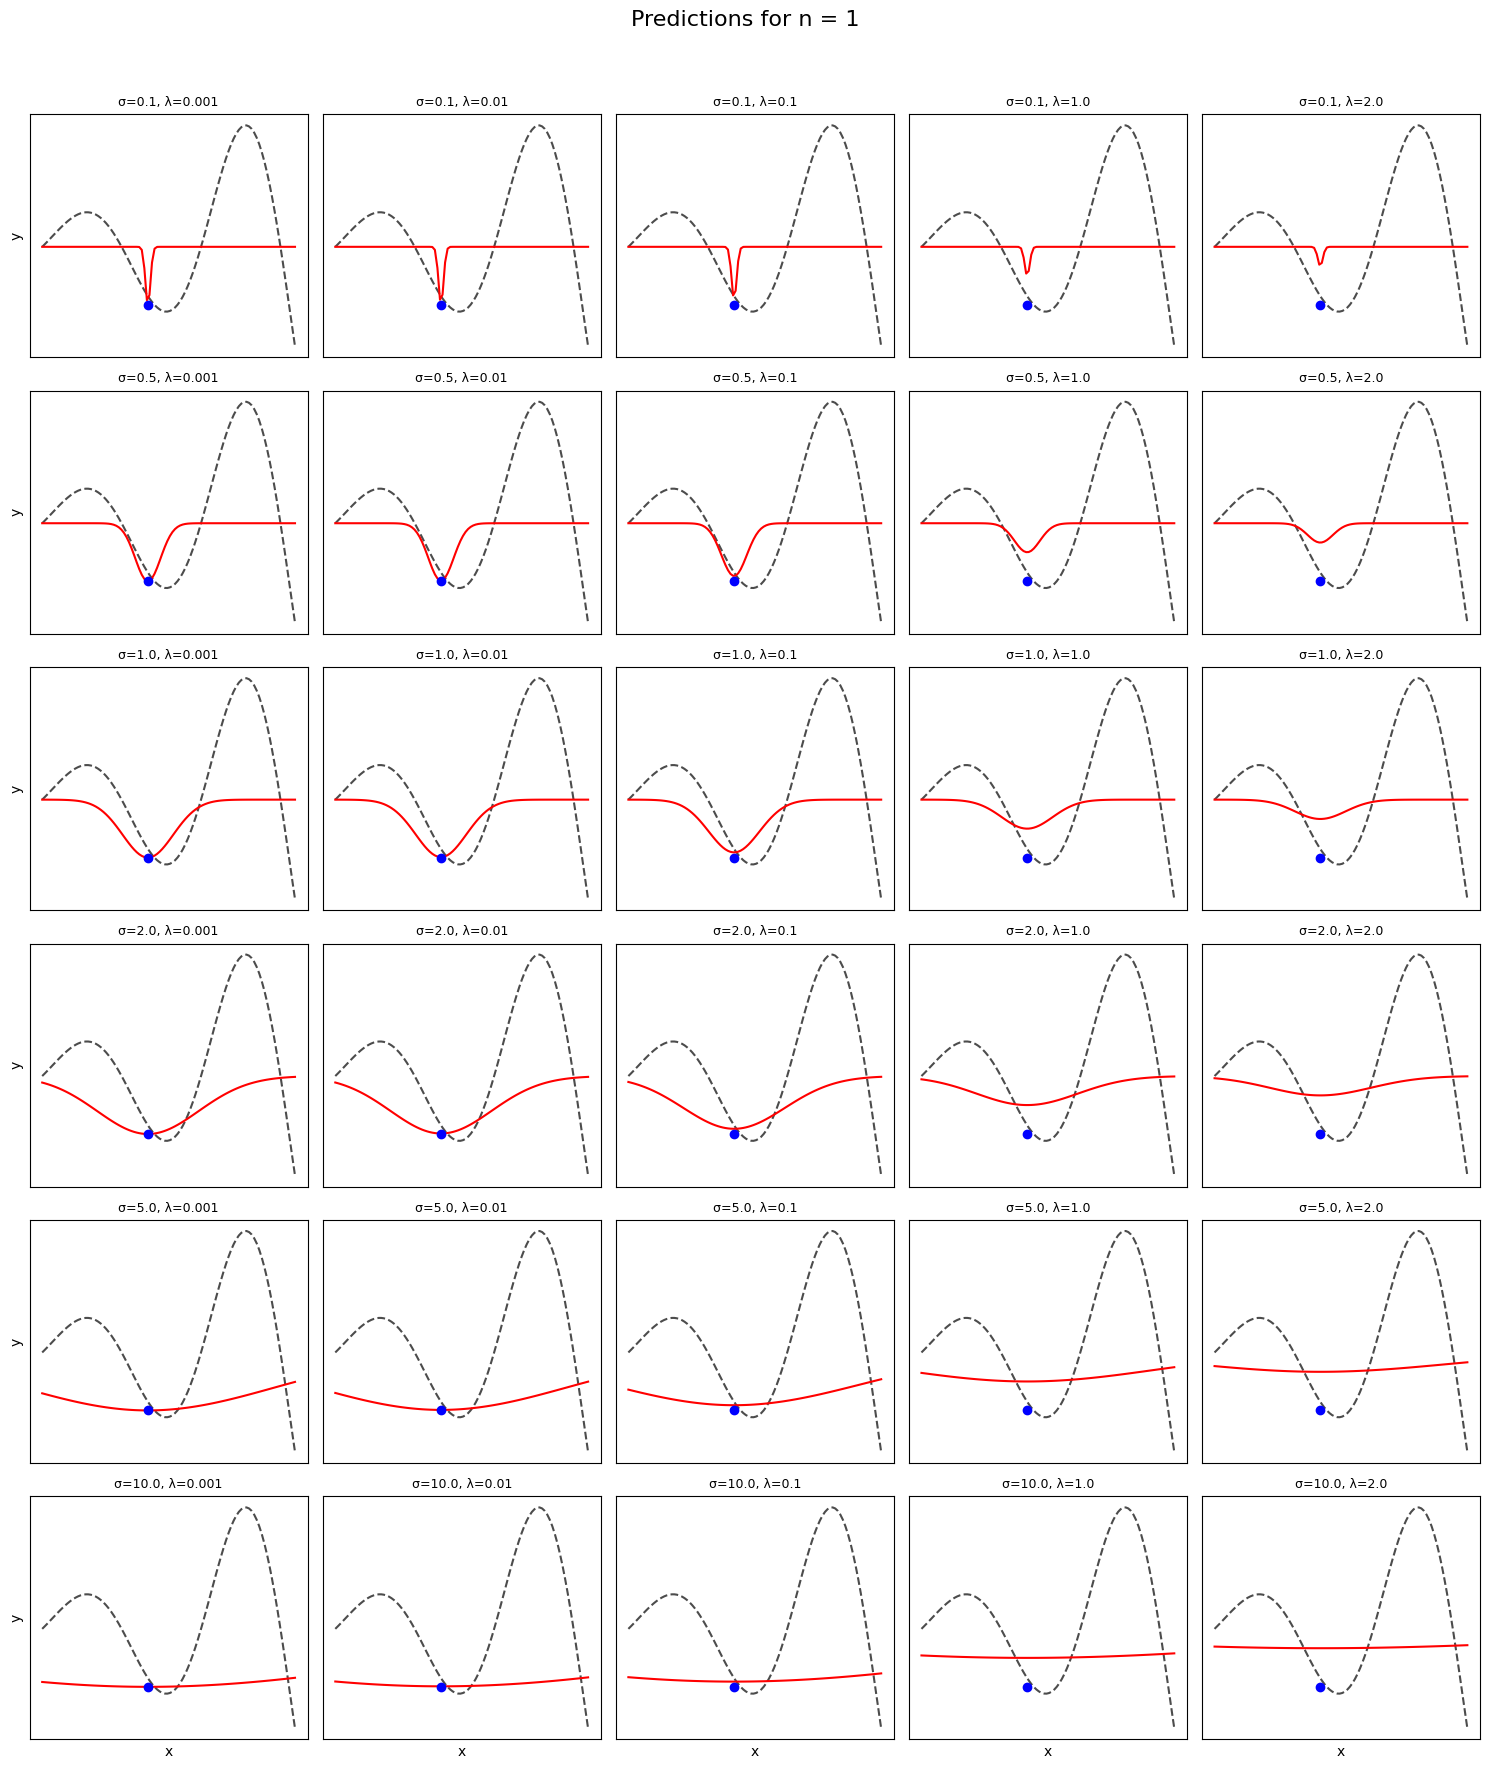

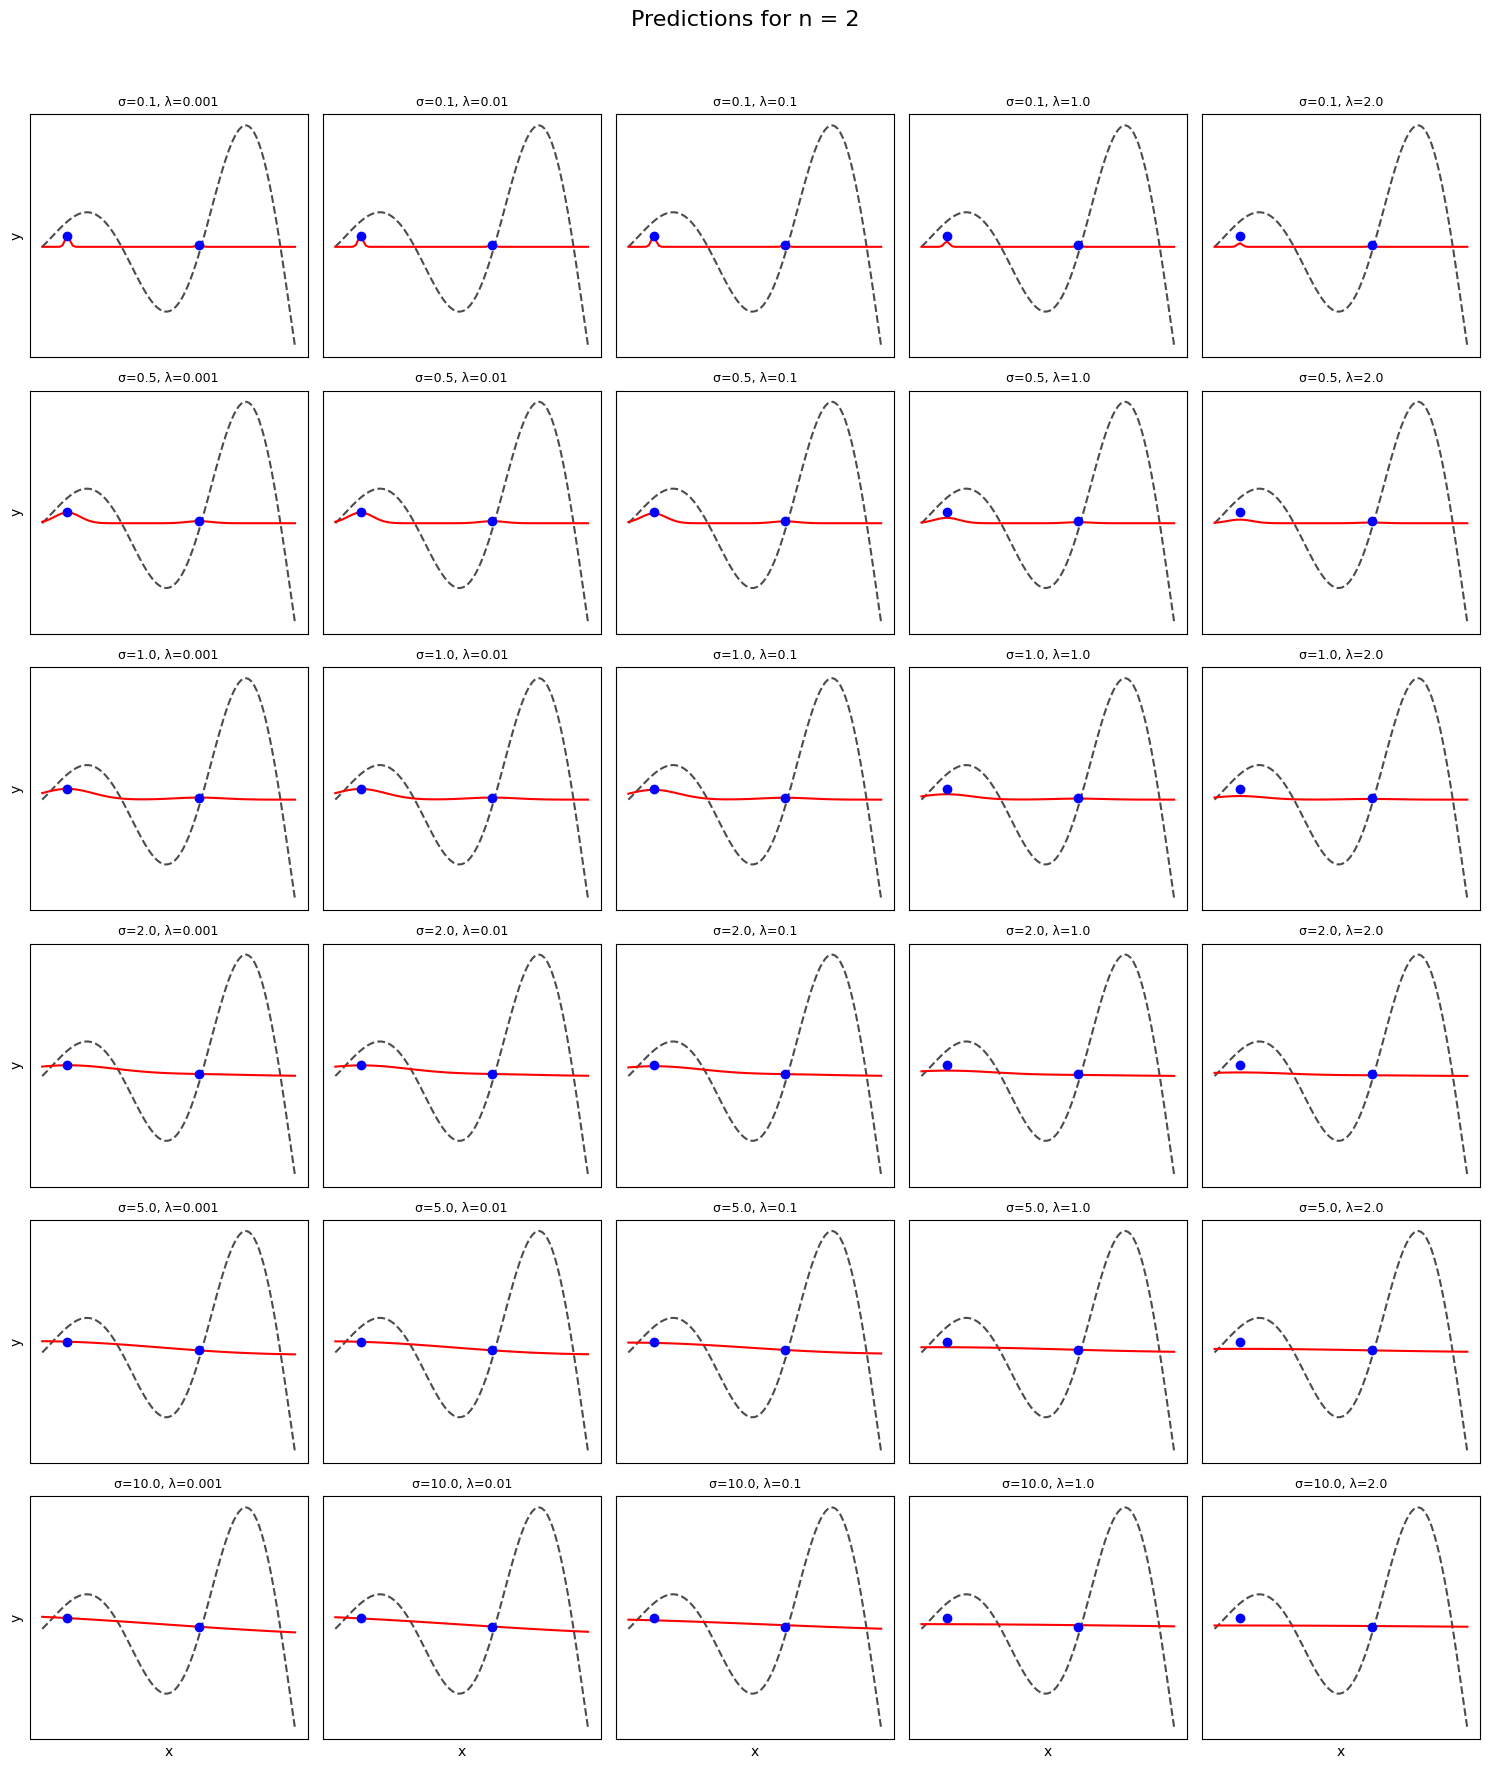

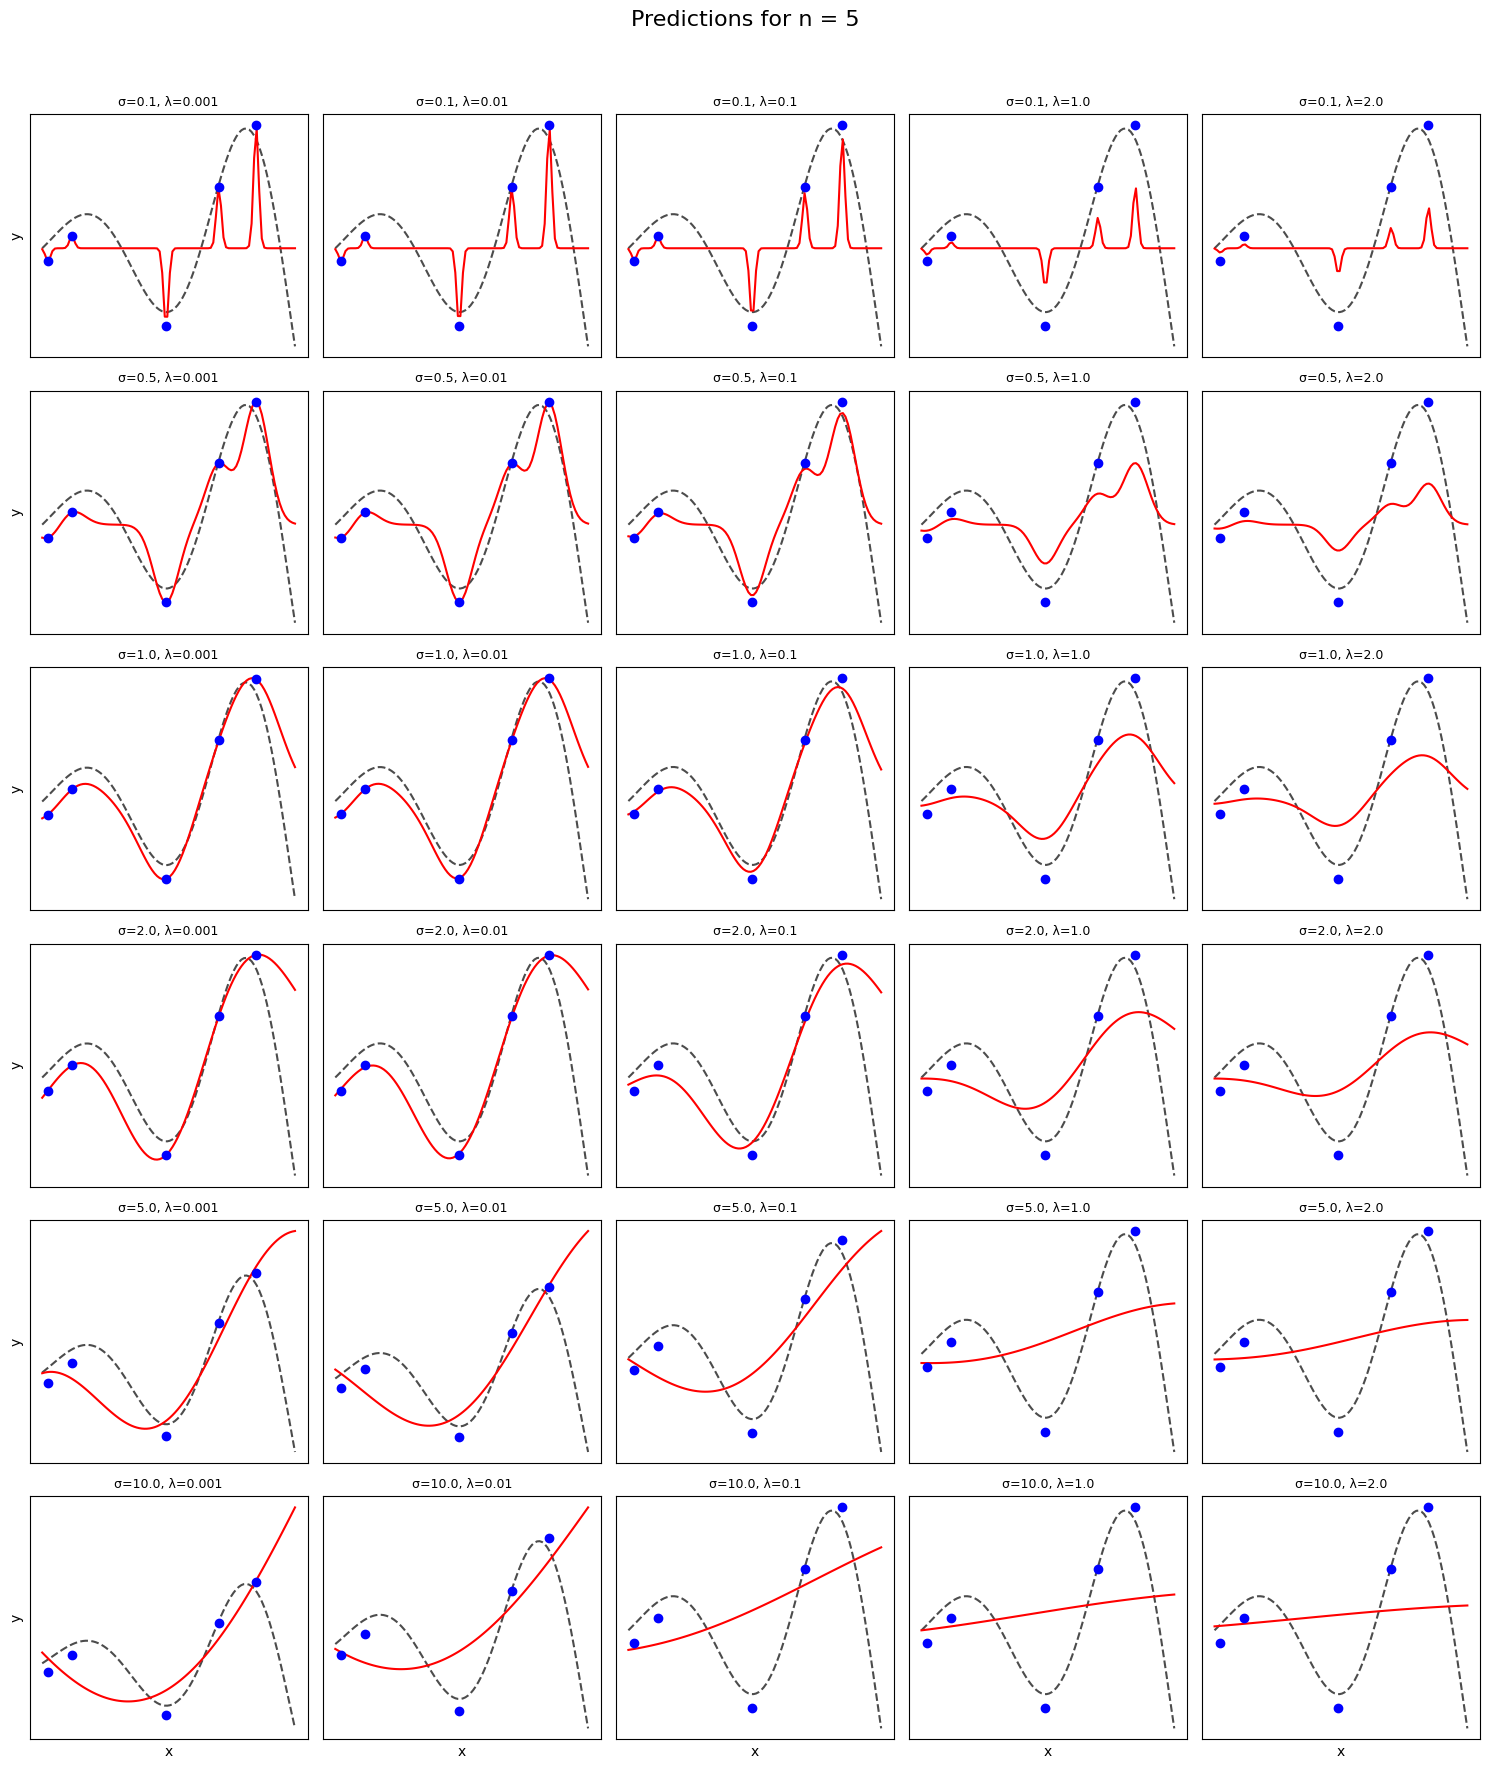

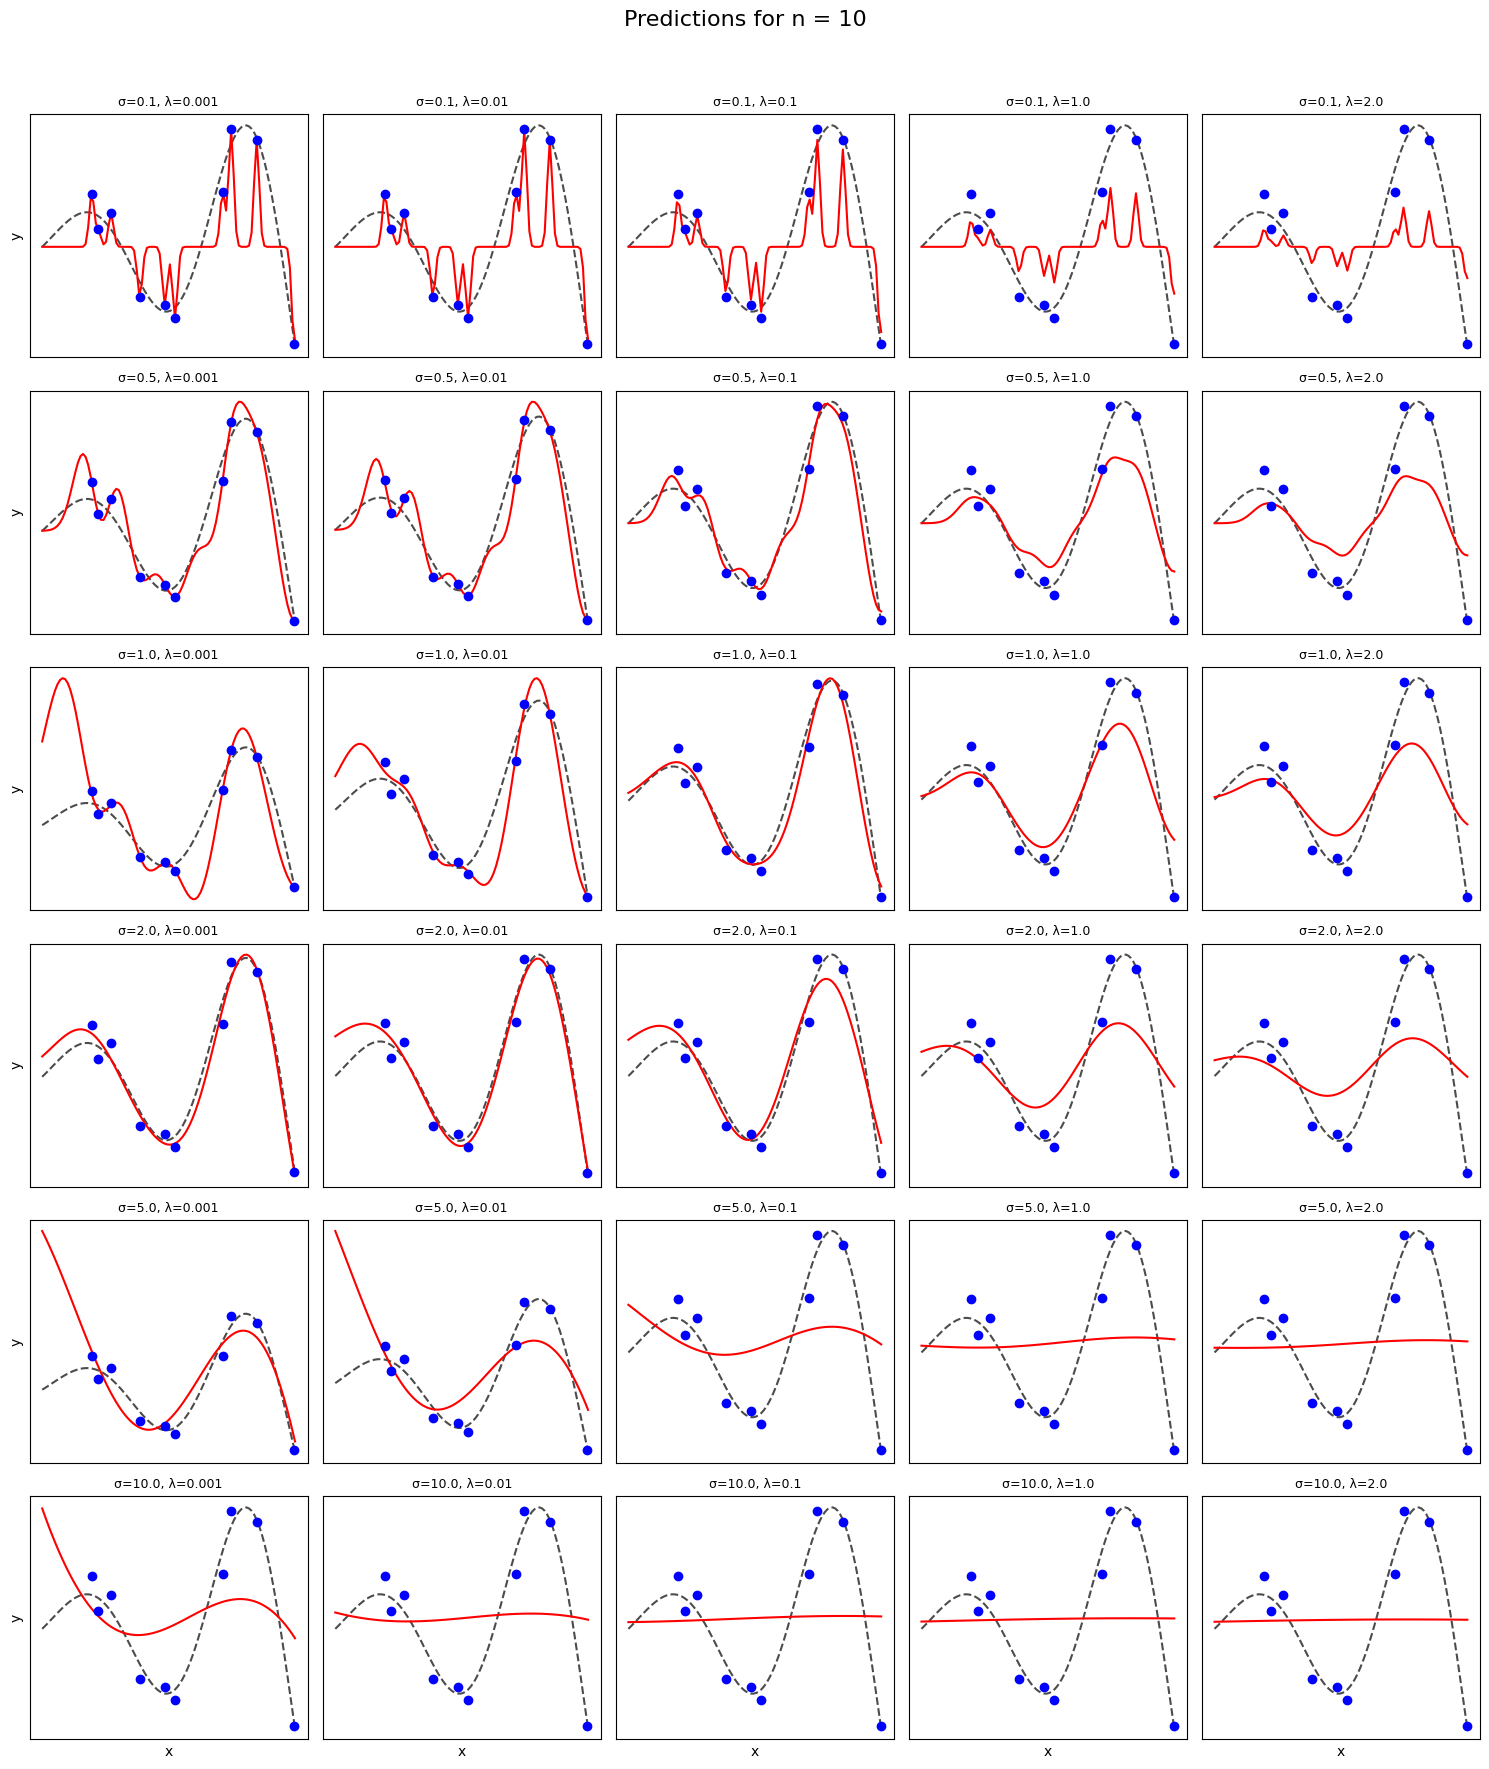

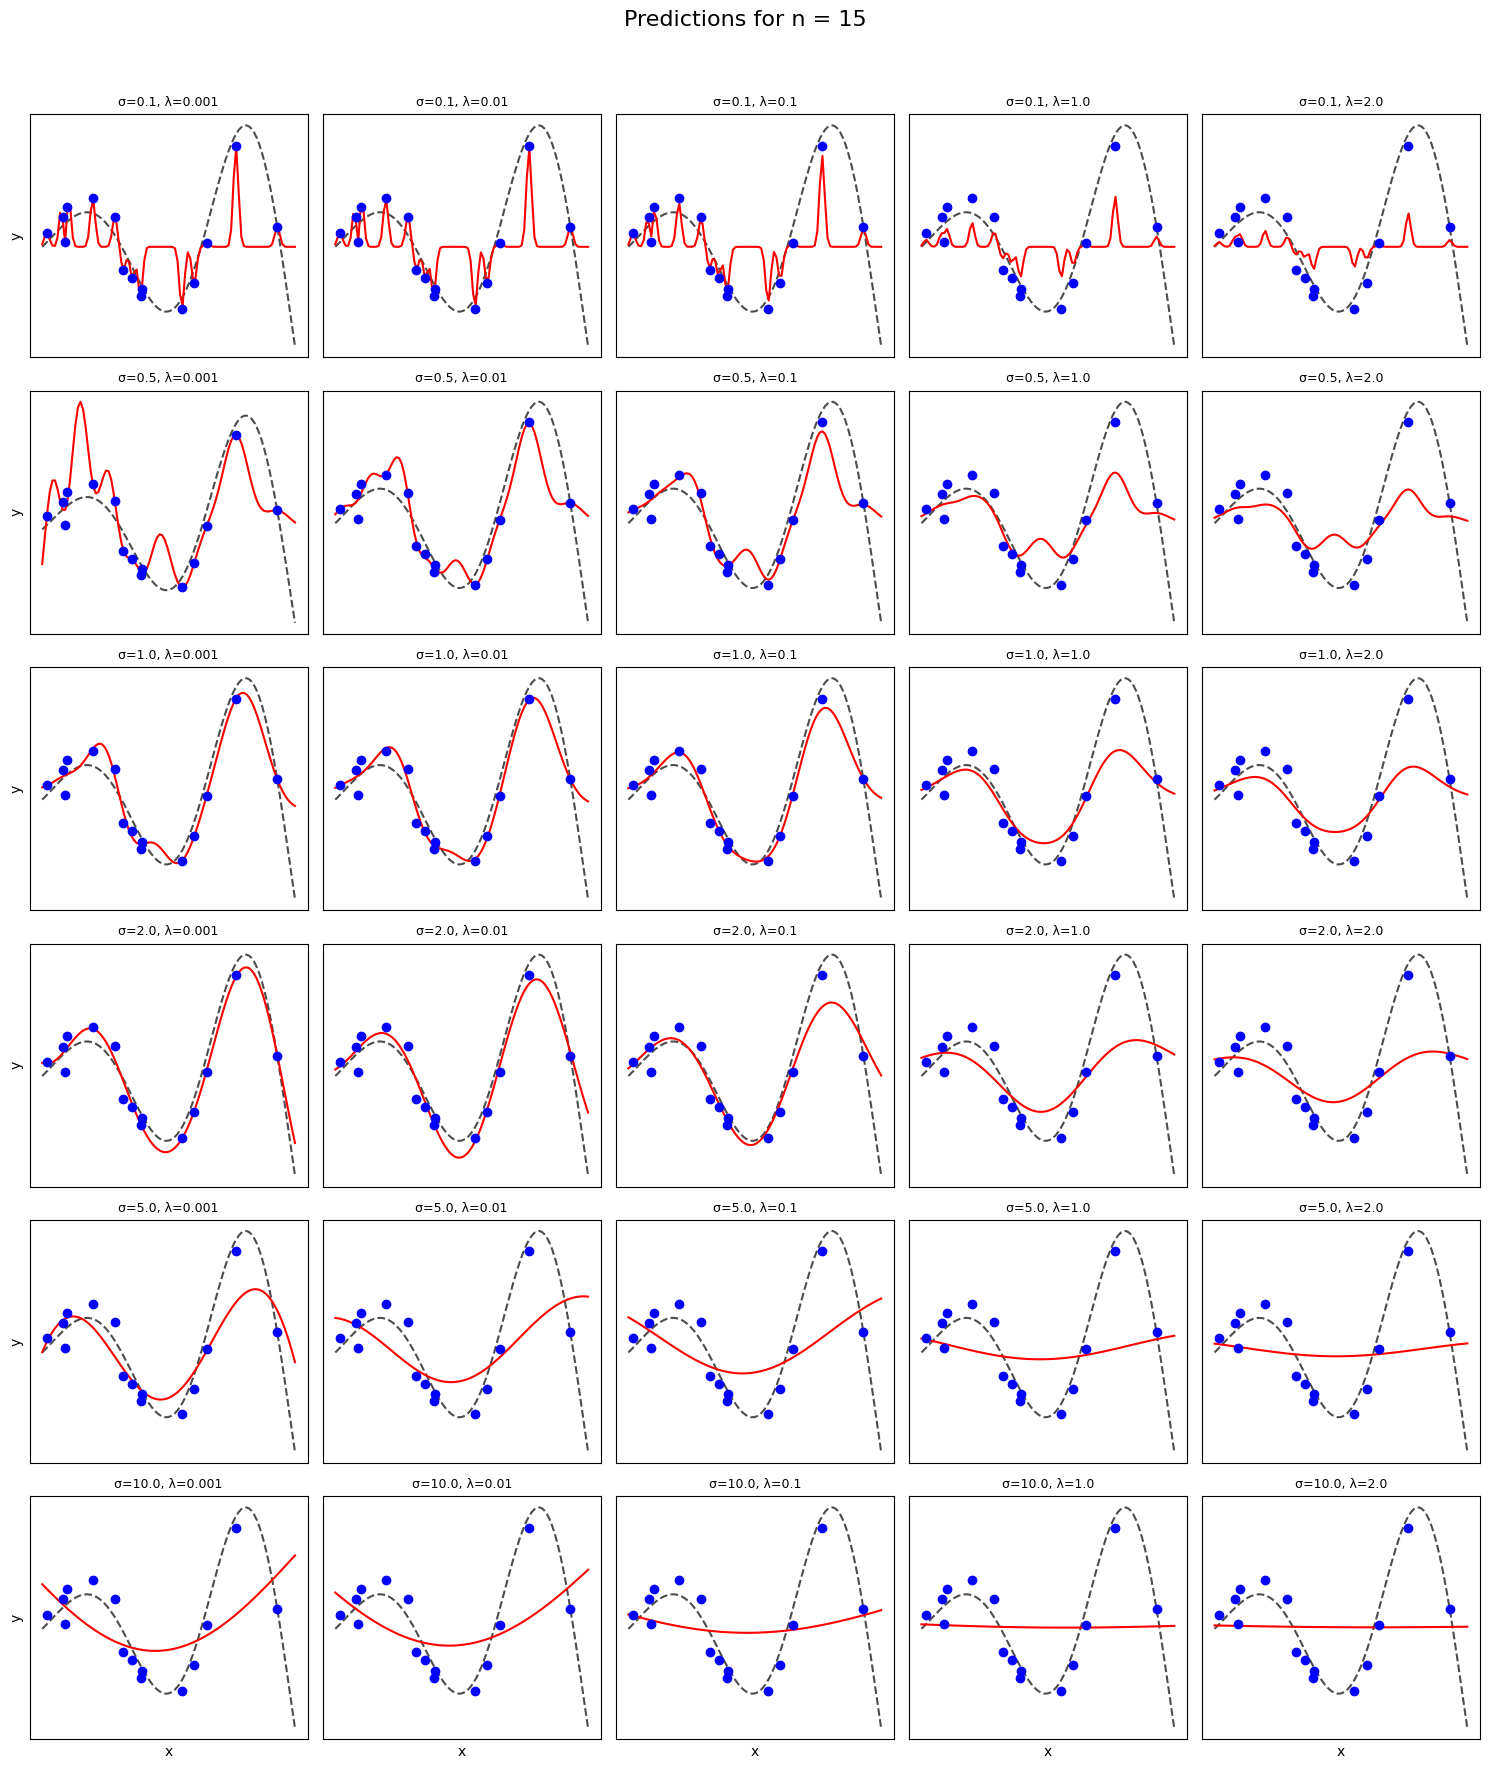

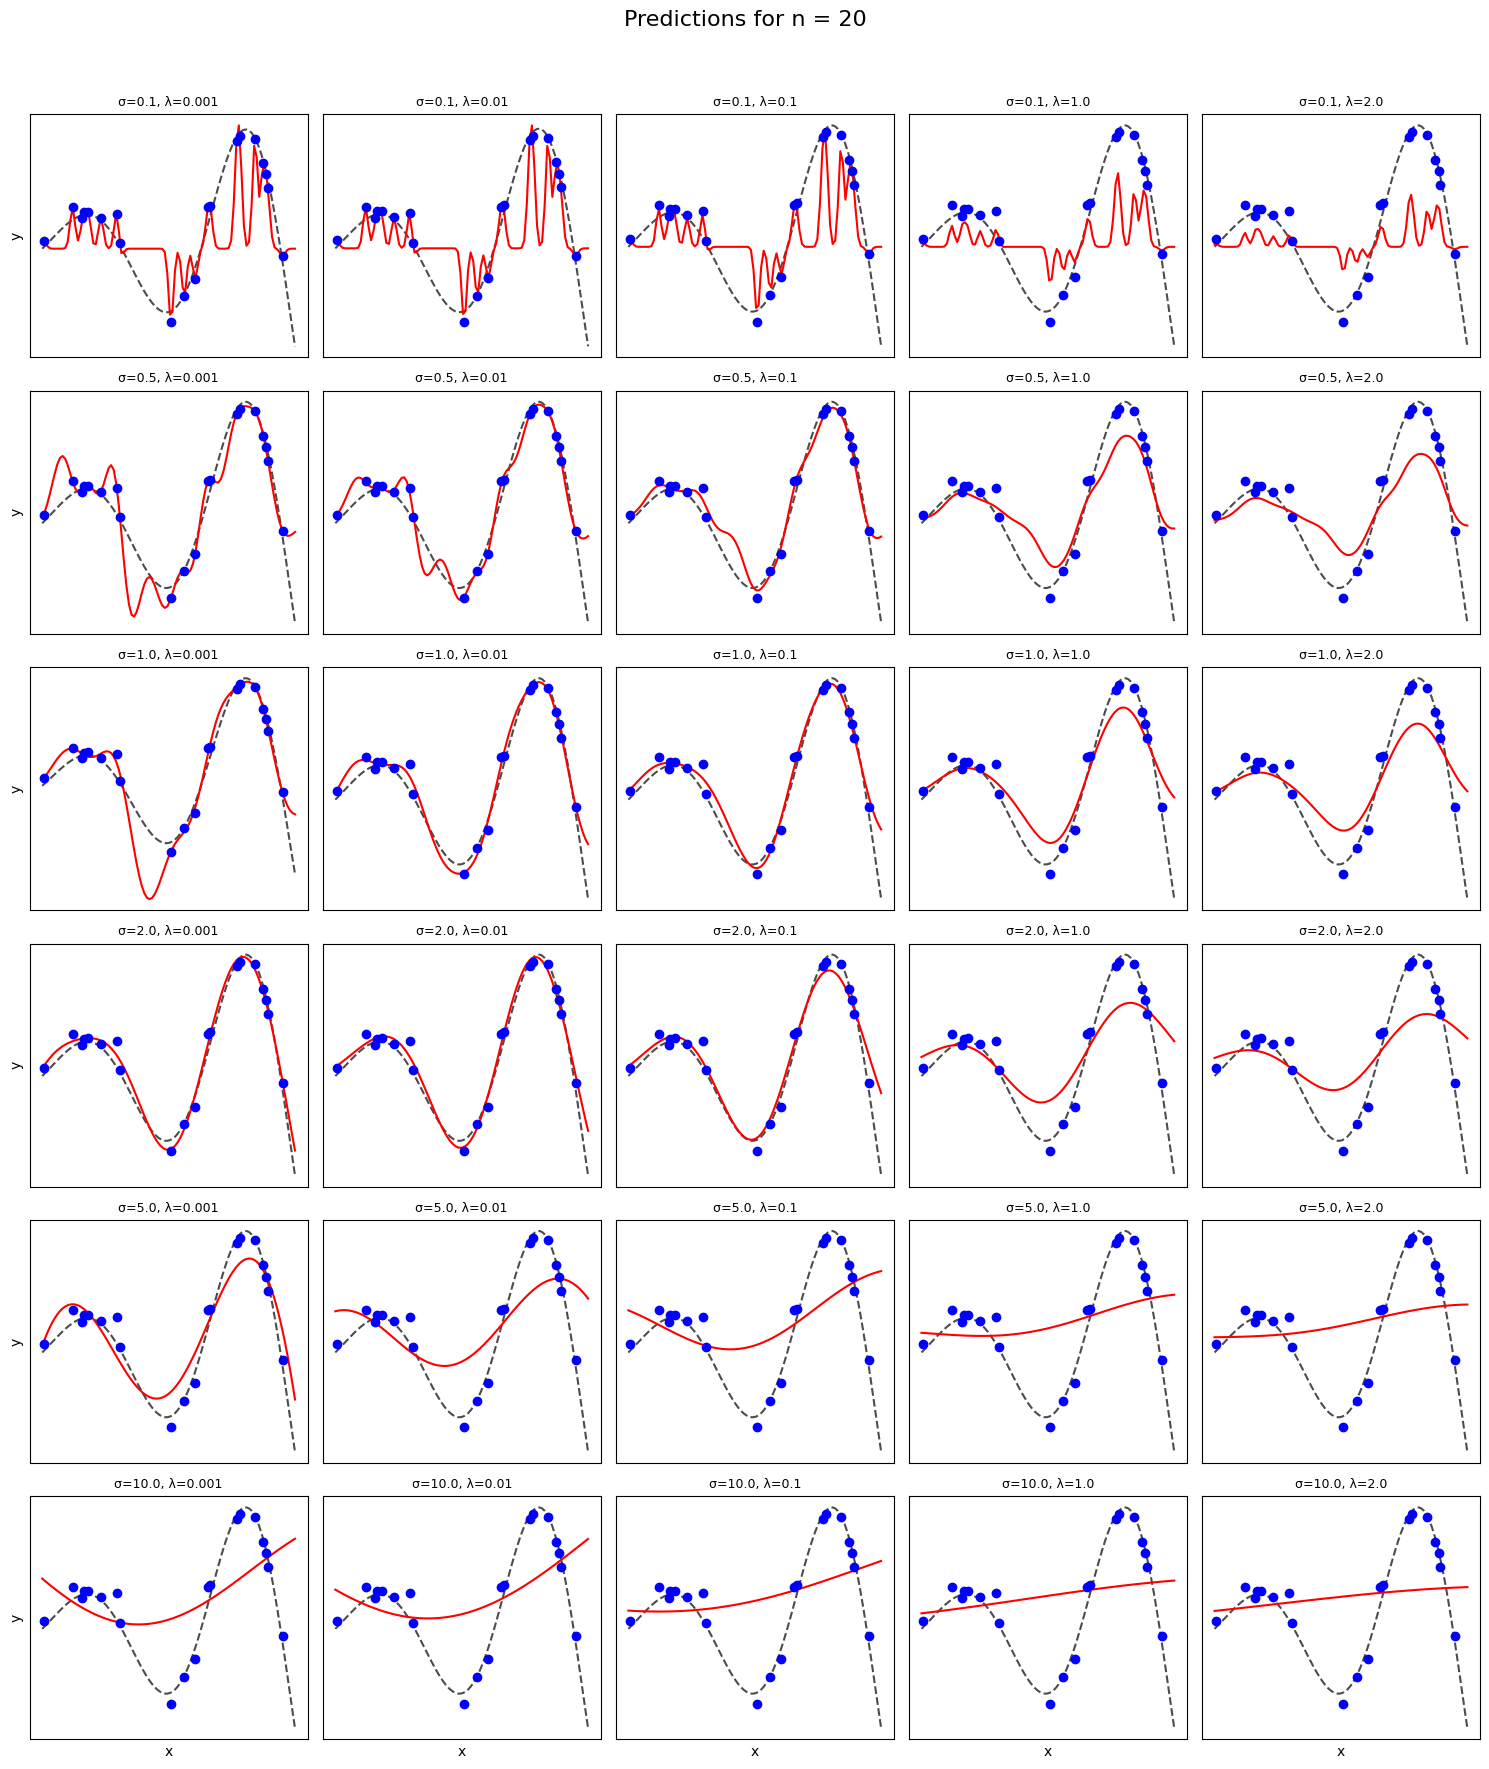

In [124]:
import matplotlib.pyplot as plt

# Unique values of n, sig, and lam
n_unique = results["Num Points (n)"].unique()
sig_values = np.sort(results["Lengthscale (σ)"].unique())
lam_values = np.sort(results["Regularization (λ)"].unique())

# Full dataset (ground truth)
x_values = np.linspace(0, 10, 100)
y_values = f(x_values)  # True function

# Loop through each training data size (n)
for n in n_unique:
    fig, axes = plt.subplots(nrows=len(sig_values), ncols=len(lam_values), figsize=(15, 18))
    fig.suptitle(f"Predictions for n = {n}", fontsize=16)

    for i, sig in enumerate(sig_values):
        for j, lam in enumerate(lam_values):
            # Select the corresponding result
            subset = results[
                (results["Num Points (n)"] == n) &
                (results["Lengthscale (σ)"] == sig) &
                (results["Regularization (λ)"] == lam)
            ]
            
            if not subset.empty:
                y_pred = subset["Predictions (y_pred)"].values[0]  # Extract predictions
                x_train = subset["x_train"].values[0]  # Extract training x-values
                y_train_noisy = subset["y_train_noisy"].values[0]  # noisy y values
                
                ax = axes[i, j]
                ax.plot(x_values, y_values, label="True Function", color="black", linestyle="dashed", alpha=0.7)
                ax.plot(x_values, y_pred, label="Predicted", color="red")
                ax.scatter(x_train, y_train_noisy, color="blue", marker="o", label="Training Points", zorder=3)

                # Titles and labels
                ax.set_title(f"σ={sig}, λ={lam}", fontsize=9)
                ax.set_xticks([])
                ax.set_yticks([])

                # Reduce clutter by only showing some axis labels
                if i == len(sig_values) - 1:
                    ax.set_xlabel("x")
                if j == 0:
                    ax.set_ylabel("y")

    # Adjust layout and show
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


Molecular solubility dataset
----

The dataset below contains the solubility of nearly 10K molecules. The original data came from here: 

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/OVHAW8<br>
https://www.nature.com/articles/s41597-019-0151-1

In [125]:
import pandas

In [126]:
sol = pandas.read_csv("curated-solubility-dataset.csv")

In [127]:
sol

ID                                               Name  \
0      A-3         N,N,N-trimethyloctadecan-1-aminium bromide   
1      A-4                           Benzo[cd]indol-2(1H)-one   
2      A-5                               4-chlorobenzaldehyde   
3      A-8  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4      A-9  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   
...    ...                                                ...   
9977  I-84                                         tetracaine   
9978  I-85                                       tetracycline   
9979  I-86                                             thymol   
9980  I-93                                          verapamil   
9981  I-94                                           warfarin   

                                                  InChI  \
0     InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1     InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2           InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3     InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4     InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   
...                                                 ...   
9977  InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...   
9978  InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...   
9979  InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...   
9980  InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...   
9981  InChI=1S/C19H16O4/c1-12(20)11-15(13-7-3-2-4-8-...   

                         InChIKey  \
0     SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1     GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2     AVPYQKSLYISFPO-UHFFFAOYSA-N   
3     XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4     FAUAZXVRLVIARB-UHFFFAOYSA-N   
...                           ...   
9977  GKCBAIGFKIBETG-UHFFFAOYSA-N   
9978  OFVLGDICTFRJMM-WESIUVDSSA-N   
9979  MGSRCZKZVOBKFT-UHFFFAOYSA-N   
9980  SGTNSNPWRIOYBX-UHFFFAOYSA-N   
9981  PJVWKTKQMONHTI-UHFFFAOYSA-N   

                                                 SMILES  Solubility        SD  \
0                   [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -3.616127  0.000000   
1                                  O=C1Nc2cccc3cccc1c23   -3.254767  0.000000   
2                                       Clc1ccc(C=O)cc1   -2.177078  0.000000   
3     [Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...   -3.924409  0.000000   
4     C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -4.662065  0.000000   
...                                                 ...         ...       ...   
9977                     C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C   -3.010000  0.000000   
9978  OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...   -2.930000  0.000000   
9979                                c1(cc(ccc1C(C)C)C)O   -2.190000  0.019222   
9980  COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...   -3.980000  0.000000   
9981              CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O   -4.780000  0.450506   

      Ocurrences Group    MolWt  ...  NumRotatableBonds  NumValenceElectrons  \
0              1    G1  392.510  ...               17.0                142.0   
1              1    G1  169.183  ...                0.0                 62.0   
2              1    G1  140.569  ...                1.0                 46.0   
3              1    G1  756.226  ...               10.0                264.0   
4              1    G1  422.525  ...               12.0                164.0   
...          ...   ...      ...  ...                ...                  ...   
9977           1    G1  264.369  ...                8.0                106.0   
9978           1    G1  444.440  ...                2.0                170.0   
9979           3    G5  150.221  ...                1.0                 60.0   
9980           1    G1  454.611  ...               13.0                180.0   
9981           3    G5  308.333  ...                4.0                116.0   

      NumAromaticRings  NumSaturatedRings  NumAliphaticRings  RingCount  \
0                  0.0                0.0                0.0    

In [128]:
sol.columns

Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

In [129]:
sol['Solubility'][0] # here is how to access a given property, here the solubility of the first molecule

-3.6161271205

(array([  2.,   0.,   0.,   2.,   0.,   4.,   0.,   1.,   3.,   3.,  10.,
         12.,  20.,  37.,  45.,  68.,  90., 110., 122., 148., 155., 140.,
        119., 143., 181., 223., 259., 294., 340., 362., 397., 405., 489.,
        494., 597., 566., 527., 564., 511., 444., 399., 340., 293., 245.,
        284., 255., 224.,  39.,  13.,   3.]),
 array([-1.31719000e+01, -1.28657084e+01, -1.25595167e+01, -1.22533251e+01,
        -1.19471335e+01, -1.16409418e+01, -1.13347502e+01, -1.10285586e+01,
        -1.07223669e+01, -1.04161753e+01, -1.01099837e+01, -9.80379204e+00,
        -9.49760041e+00, -9.19140878e+00, -8.88521715e+00, -8.57902551e+00,
        -8.27283388e+00, -7.96664225e+00, -7.66045062e+00, -7.35425898e+00,
        -7.04806735e+00, -6.74187572e+00, -6.43568409e+00, -6.12949245e+00,
        -5.82330082e+00, -5.51710919e+00, -5.21091756e+00, -4.90472593e+00,
        -4.59853429e+00, -4.29234266e+00, -3.98615103e+00, -3.67995940e+00,
        -3.37376776e+00, -3.06757613e+00, -2.76138

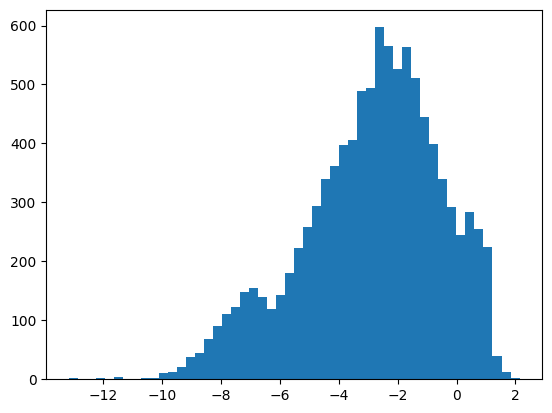

In [130]:
hist(sol['Solubility'], bins=50)

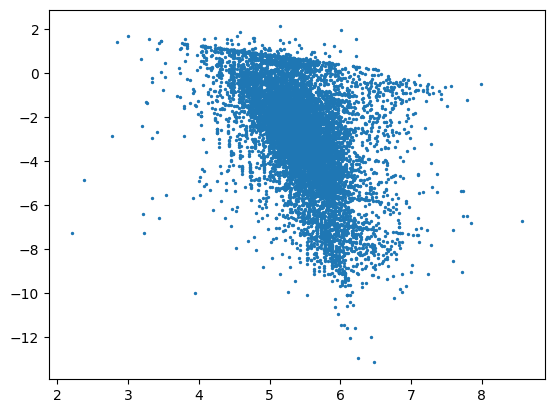

In [131]:
# we can plot the solubility against any given property. Clearly there are relationships, but the solubility is not determined well 
# by any single property. Note how it's better to work with the log of the molecular weight (MolWt)
scatter(np.log(sol['MolWt']), sol['Solubility'], s=2)

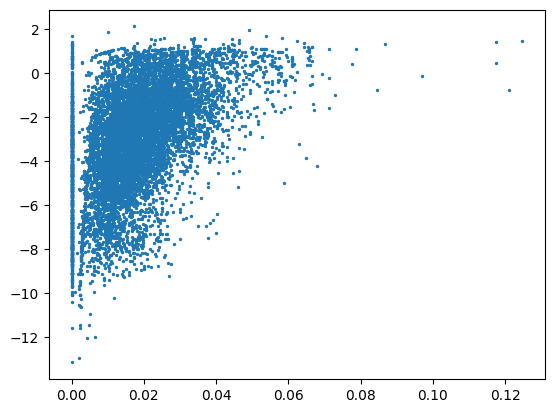

In [132]:
import matplotlib.pyplot as plt


plt.scatter((sol['NumHAcceptors']+sol['NumHDonors'])/sol['MolWt'], sol['Solubility'], s=2)

Linear fit
---

In [133]:
Y = np.array(sol['Solubility']); 

proplist = ['HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount']

X = np.array([list(sol[prop]/sol['MolWt']) for prop in proplist]) # Many properties are extensive, so we divide by the molecular weight
X = np.insert(X, 0, list(np.log(sol['MolWt'])), axis=0) # add the log MolWt as well

In [134]:
X.shape # we have 11 properties

(11, 9982)

In [135]:
c,_,_,_ = np.linalg.lstsq(X.T, Y) # here we fit a LINEAR MODEL , solving the equation  X.T @ c = Y

/var/folders/8m/mlfdjz4d5bd1hd67c6nkhb_00000gn/T/ipykernel_47461/2538874286.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c,_,_,_ = np.linalg.lstsq(X.T, Y) # here we fit a LINEAR MODEL , solving the equation  X.T @ c = Y


In [136]:
c # these are the resulting fitting coefficients

array([ -1.10944433, -30.53332194,  79.21167928,  55.03896321,
        25.21188812, -28.95483872,  11.72036499, -45.36677569,
        42.95943772, -16.12008719, -61.48686288])

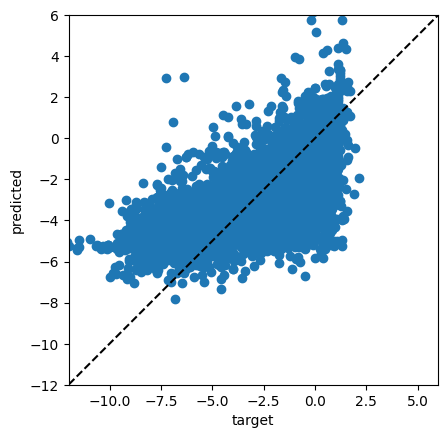

In [137]:
# now we make a scatter plot of target solubility versus predicted solubility
plt.scatter(Y, X.T @ c)
plt.plot([-50,50], [-50,50], 'k--')
plt.xlim(-12,6)
plt.ylim(-12,6)
plt.ylabel('predicted')
plt.xlabel('target')
plt.gca().set_aspect('equal')

In [138]:
# We can calculate the mean squared error of our fit. The solubility values are such that a method with prediction error > 1 is not that useful. 
np.sqrt(sum((Y- X.T @ c)**2)/len(Y))

1.765213071362543

Task 2
---

Now use the Kernel Ridge Regression method to make a kernel fit of the solubility. Your kernel should still be the Gaussian function, but
it operates on vector arguments. You can start with a single sigma, identical for each property, but then choose different lengthscales (sig) in each dimension (a sensible starting value is the standard deviation of the data in each dimension) 

$$
K(x, x') = e^{-\sum_i|x_i-x'_i|^2/(2\sigma_i^2)}
$$

Here $x_i$ refers not to the $i$th data point, but to the $i$th element of the multidimensional data point vector $x$. Optimise the regularisation 
strength to obtain the best fit. You should split your data into a training and test set, and report the prediction error separately. 

In [139]:
import numpy as np

def vector_kernel(x1, x2, sig):
    """
    Multidimensional Gaussian Kernel.
    x1, x2: vectors of the same dimension
    sig: vector of lengthscales (one per dimension)
    """
    diff = x1 - x2  # Element-wise difference
    return np.exp(-np.sum((diff ** 2) / (2 * sig ** 2)))  # Apply per-dimension lengthscale

def train_krr(x_train, y_train, sig, lam):
    """Computes c = (K + lam I)^-1 y for kernel ridge regression."""
    n_train = x_train.shape[0]
    K = np.zeros((n_train, n_train))
    for i in range(n_train):
        for j in range(n_train):
            K[i, j] = vector_kernel(x_train[i], x_train[j], sig)
    
    c = np.linalg.solve(K + lam * np.eye(n_train), y_train)
    return c

def predict_krr(x_test, x_train, c, sig):
    """Uses the cross-kernel K_s = k(x_test, x_train) to predict."""
    n_test = x_test.shape[0]
    n_train = x_train.shape[0]
    K_s = np.zeros((n_test, n_train))
    for i in range(n_test):
        for j in range(n_train):
            K_s[i, j] = vector_kernel(x_test[i], x_train[j], sig)
    return K_s @ c



In [149]:
from sklearn.model_selection import train_test_split

Y = np.array(sol['Solubility']).flatten()  # Ensure Y is 1D

# Feature matrix (each row = sample, each column = feature)
proplist = ['HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
            'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
            'NumSaturatedRings', 'NumAliphaticRings', 'RingCount']

X = np.array([list(sol[prop] / sol['MolWt']) for prop in proplist])  # Normalize extensive properties
X = np.insert(X, 0, list(np.log(sol['MolWt'])), axis=0)  # Add log MolWt
X = X.T  # Transpose so rows = samples, columns = features

# Compute lengthscales (std per feature)
sig = np.std(X, axis=0)

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(sig)

[0.54511074 0.01130269 0.00805358 0.00604185 0.01015062 0.01276671
 0.06211851 0.00389059 0.0030822  0.00356238 0.004671  ]


In [152]:
# Define lambda (regularization)
lam = 0.75  # Can be optimized

sig = np.std(X, axis=0)

# 1) Subselect or not from X_train, Y_train
n_inducing_points = 1000
idx = np.random.choice(len(X_train), n_inducing_points, replace=False)
x_sub = X_train[idx]
y_sub = Y_train[idx]

# 2) Train
c = train_krr(x_sub, y_sub, sig, lam)

# 3) Predict on train
y_pred_train = predict_krr(x_sub, x_sub, c, sig)

# 4) Predict on test
y_pred_test = predict_krr(X_test, x_sub, c, sig)

# 5) Compute errors
train_mse = np.mean((y_pred_train - y_sub) ** 2)
test_mse = np.mean((y_pred_test - Y_test) ** 2)

print(f"Training RMSE: {train_mse**(1/2):.4f}")
print(f"Test RMSE: {test_mse**(1/2):.4f}")

Training RMSE: 1.5163
Test RMSE: 1.7070


In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume train_krr, predict_krr, X_train, Y_train, X_test, Y_test, and sig are defined.

# 1) Subselect 500 points from X_train, Y_train
n_inducing_points = 1000
idx = np.random.choice(len(X_train), n_inducing_points, replace=False)
x_sub = X_train[idx]
y_sub = Y_train[idx]

# Define the list of lambda values you want to sweep over
lambda_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0]

results = []

# Loop over each lambda and evaluate
for lam in lambda_values:
    # 2) Train
    c = train_krr(x_sub, y_sub, sig, lam)

    # 3) Predict on the training subset
    y_pred_train = predict_krr(x_sub, x_sub, c, sig)

    # 4) Predict on the test set
    y_pred_test = predict_krr(X_test, x_sub, c, sig)

    # 5) Compute errors
    train_mse = np.mean((y_pred_train - y_sub) ** 2)
    test_mse = np.mean((y_pred_test - Y_test) ** 2)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    # Print to keep track of progress and results
    print(f"Lambda: {lam}")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print("-----------")

    # Save results for plotting later
    results.append({
        'lambda': lam,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse
    })

# Create a pandas DataFrame for easier analysis & visualization later
df_results = pd.DataFrame(results)
print(df_results)


Lambda: 1e-06
Training RMSE: 0.1755
Test RMSE: 5.9877
-----------
Lambda: 1e-05
Training RMSE: 0.3496
Test RMSE: 3.6052
-----------
Lambda: 0.0001
Training RMSE: 0.5547
Test RMSE: 2.5067
-----------
Lambda: 0.001
Training RMSE: 0.7888
Test RMSE: 1.9869
-----------
Lambda: 0.01
Training RMSE: 1.0214
Test RMSE: 1.7083
-----------
Lambda: 0.1
Training RMSE: 1.2414
Test RMSE: 1.6712
-----------
Lambda: 1.0
Training RMSE: 1.5134
Test RMSE: 1.7600
-----------
Lambda: 10.0
Training RMSE: 1.9360
Test RMSE: 2.0099
-----------
      lambda  train_rmse  test_rmse
0   0.000001    0.175476   5.987732
1   0.000010    0.349597   3.605199
2   0.000100    0.554667   2.506746
3   0.001000    0.788815   1.986879
4   0.010000    1.021394   1.708321
5   0.100000    1.241429   1.671225
6   1.000000    1.513385   1.760006
7  10.000000    1.936040   2.009886


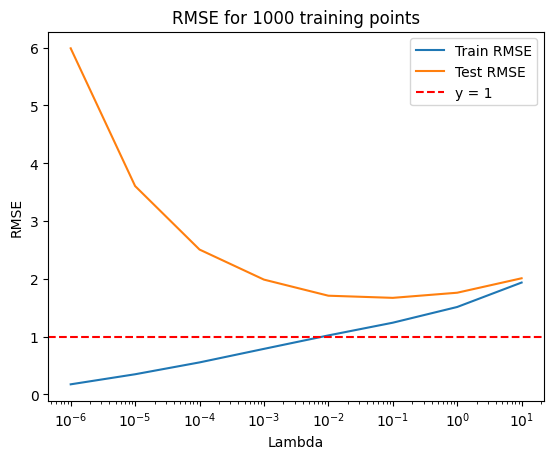

In [162]:
# Example: you can then plot RMSE vs lambda (optional)
plt.plot(df_results['lambda'], df_results['train_rmse'], label='Train RMSE')
plt.plot(df_results['lambda'], df_results['test_rmse'], label='Test RMSE')

# Add a red dashed horizontal line at y = 1
plt.axhline(y=1, color='red', linestyle='--', label='y = 1')

plt.title('RMSE for 1000 training points')
plt.xscale('log')  # often helpful with lambda sweeps
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Optional extension
---

You can optimise the $\sigma$ array formally, by minimising an objective function, e.g. the error on a _test set_, or even better,
average error on multiple test sets (given multiple random test/train splits). You can make the regulariser $\lambda$ part of the
optimisation too. 

In [164]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

# Store all results for later analysis
results_list = []

# Define the objective function: RMSE on test data
def krr_objective(params, X, Y, test_size=0.2, random_state=42):
    """
    Objective function to optimize sigma (lengthscales) and lambda.
    The params array consists of:
        - First d values: sigma (lengthscale per feature)
        - Last value: lambda (regularization term)
    Returns: Average RMSE over multiple train-test splits.
    """
    d = X.shape[1]  # Number of features
    sig = np.abs(params[:d])  # Ensure sigma values are positive
    lam = np.abs(params[d])   # Ensure lambda is positive
    
    # Perform multiple train-test splits and compute the average RMSE
    num_splits = 5  # Number of random splits
    total_rmse = 0
    
    for split in range(num_splits):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state+split)

        # Train KRR model **only on training data**
        c = train_krr(X_train, Y_train, sig, lam)

        # Predict on test set
        Y_pred_test = predict_krr(X_test, X_train, c, sig)

        # Compute RMSE
        rmse = np.sqrt(np.mean((Y_pred_test - Y_test) ** 2))
        total_rmse += rmse

        # Print intermediate results
        print(f"Split {split+1}/{num_splits}: RMSE = {rmse:.4f}")

    avg_rmse = total_rmse / num_splits  # Compute average RMSE
    print(f"\nLambda: {lam:.6f}, Average RMSE: {avg_rmse:.4f}")
    
    # Store results in the list
    results_list.append({
        'sigma': sig.copy(),
        'lambda': lam,
        'avg_rmse': avg_rmse
    })
    
    return avg_rmse  # Return RMSE for optimization

# Initialize sigmas to feature standard deviations and lambda to a reasonable value
initial_sigma = np.std(X, axis=0)  # Initial sigma values
initial_lambda = 0.1  # Initial lambda value (from previous investigations)
initial_params = np.hstack([initial_sigma, initial_lambda])

# Optimize sigma and lambda
result = minimize(
    krr_objective, initial_params, args=(X, Y),
    method='L-BFGS-B', bounds=[(1e-6, None)] * (X.shape[1] + 1),  # Ensure positivity
    options={'disp': True}
)

# Extract optimized sigmas and lambda
optimal_sigma = result.x[:-1]  # Optimized sigma values
optimal_lambda = result.x[-1]   # Optimized lambda

print("\n--- Optimization Complete ---")
print("Optimized Sigma:", optimal_sigma)
print("Optimized Lambda:", optimal_lambda)

# Convert results list to DataFrame for later visualization
df_results = pd.DataFrame(results_list)
print("\nAll results:\n", df_results)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9fbaf274-3ce1-46bd-9b35-f9182e2ad3ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>